In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [23]:
len(data)

3239

In [24]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [25]:
len(label)

3239

In [26]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [27]:
data = data[s]
label = label[s]

In [28]:
label

array([1, 2, 0, ..., 2, 1, 1])

In [29]:
tempLabel = []
testLabel = label[2600:]

In [30]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [31]:
label = tempLabel

In [32]:
label = np.array(label)

In [33]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

In [34]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [35]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
______________________

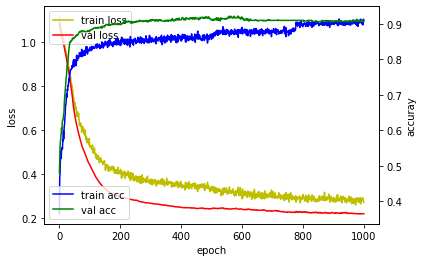

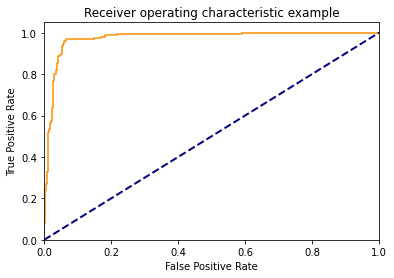


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03541667 0.03541667 0.03958333
 0.03958333 0.04166667 0.04166667 0.04583333 0.04583333 0.05
 0.05       0.05208333 0.05208333 0.05416667 0.05416667 0.05625
 0.05625    0.05833333 0.05833333 0.06041667 0.06041667 0.06458333
 0.06458333 0.14791667 0.14791667 0.17083333 0.17083333 0.18125
 0.18125    0.18333333 0.1875     0.21666667 0.21666667 0.25208333
 0.25625    0.26041667 0.26458333 0.28333333 0.2875     0.46666667
 0.475      0.54791667 0.55208333 0.59166667 0.59166667 0.82708333
 0.83125    0.83541667 0.83958333 0.86875    0.87708333 0.88541667
 0.88958333 0.89375    0.89791667 0.90208333 0.90625    0.90833333
 0.9125     0.92083333 0.925      0.92708333 0.93333333 0.9375
 0.93958

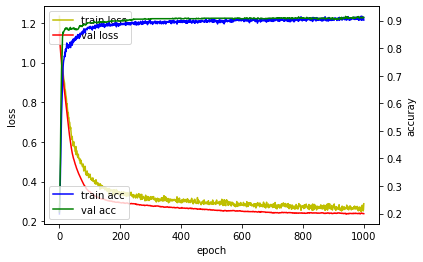

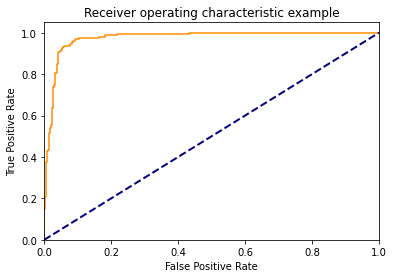


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04791667 0.04791667 0.05
 0.05       0.05416667 0.05416667 0.05625    0.05625    0.06041667
 0.06041667 0.07708333 0.07708333 0.08333333 0.08333333 0.08541667
 0.08541667 0.09166667 0.09166667 0.10416667 0.10416667 0.1625
 0.1625     0.18125    0.18125    0.18333333 0.1875     0.21666667
 0.21666667 0.22708333 0.23125    0.25416667 0.25833333 0.32083333
 0.325      0.42916667 0.43333333 0.43333333 0.49375    0.49791667
 0.60416667 0.60833333 0.66875    0.67291667 0.76875    0.77291667
 0.78958333 0.79375    0.89791667 0.90208333 0.91458333 0.91875
 0.92083333 

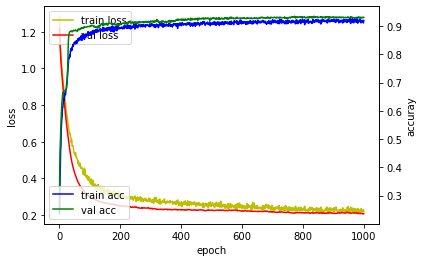

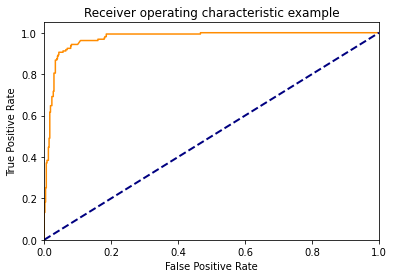


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.02708333 0.02708333 0.02916667
 0.02916667 0.03333333 0.03333333 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.05625
 0.05625    0.06458333 0.06458333 0.06875    0.06875    0.07916667
 0.07916667 0.08125    0.08125    0.1        0.10833333 0.16041667
 0.16041667 0.17916667 0.17916667 0.18125    0.18125    0.18541667
 0.18541667 0.19166667 0.19583333 0.28958333 0.29375    0.34166667
 0.34583333 0.39791667 0.40208333 0.46666667 0.46666667 0.48125
 0.48541667 0.67291667 0.67708333 0.78541667 0.78958333 1.        ]

tpr : [0.         0.01257862 0.13207547 0.13207547 0.18238994 0.18238994
 0.25157233 0.25157233 0.37106918 0.37106918 0.3836478  0.3836478
 0.44654088 0.44654088 0.49056604 0.49056604 0.6163522  0.616

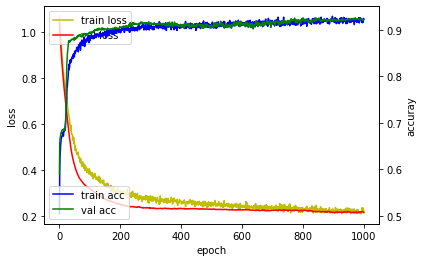

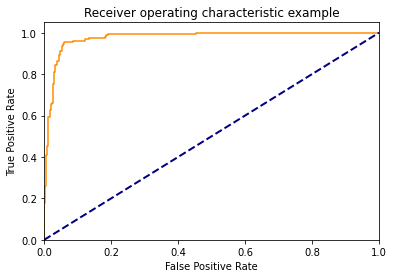


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.0375
 0.0375     0.03958333 0.03958333 0.04375    0.04375    0.04791667
 0.04791667 0.05208333 0.05208333 0.05625    0.05625    0.06041667
 0.06041667 0.08541667 0.08541667 0.12291667 0.12291667 0.13333333
 0.13333333 0.17708333 0.18125    0.18125    0.18541667 0.18541667
 0.19166667 0.19166667 0.24791667 0.25208333 0.32708333 0.33125
 0.41666667 0.42083333 0.45208333 0.45208333 0.4875     0.49166667
 0.54791667 0.55208333 0.60833333 0.6125     0.91666667 0.92083333
 1.        ]

tpr : [0.         0.01257862 0.17610063 0.17610063 0.25786164 0.25786164
 0.34591195 0.34591195 0.40880503 0.40880503 0.45283019 0.45283019
 0.50314465 0.50314465 0.59119497 0.59119497 

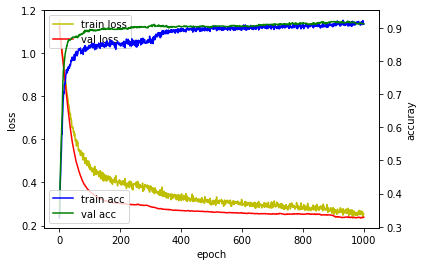

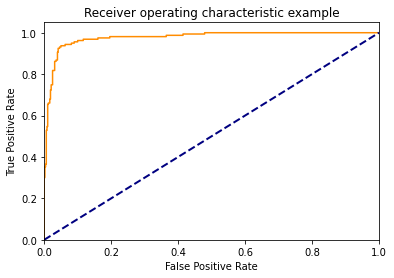


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.025      0.025      0.02708333
 0.03125    0.03125    0.03541667 0.03541667 0.03958333 0.03958333
 0.04166667 0.04166667 0.04583333 0.04583333 0.05       0.05
 0.0625     0.0625     0.08125    0.08125    0.08958333 0.08958333
 0.1        0.1        0.11666667 0.11666667 0.16041667 0.16041667
 0.19166667 0.19583333 0.19583333 0.24583333 0.25       0.26458333
 0.26875    0.2875     0.29166667 0.36458333 0.36458333 0.41458333
 0.41458333 0.43333333 0.4375     0.47916667 0.47916667 0.54583333
 0.55       0.65833333 0.6625     0.90416667 0.90833333 0.95416667
 0.95833333 0.97708333 0.98125    1.        ]

tpr : [0.         0.00628931 0.29559748 0.30188679 0.35220126 0.35220126
 0.36477987 0.36477987 0.52830189 0.52830189 0.54716981 0.54716981
 0.65408805

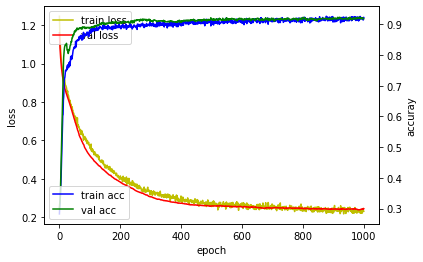

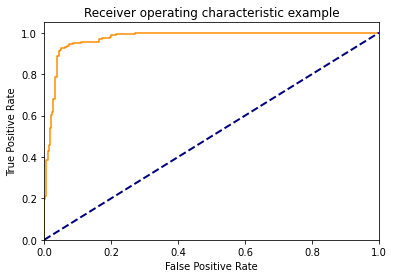


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.03125    0.03125    0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04375
 0.04375    0.04791667 0.04791667 0.05       0.05       0.0625
 0.0625     0.06666667 0.06666667 0.07291667 0.07291667 0.08541667
 0.08541667 0.11041667 0.11041667 0.16458333 0.16458333 0.17291667
 0.17291667 0.19583333 0.19583333 0.2        0.2        0.21458333
 0.21458333 0.21666667 0.22083333 0.24166667 0.24583333 0.27083333
 0.27083333 0.33333333 0.34166667 0.34375    0.34791667 0.35
 0.35416667 0.35833333 0.3625     0.375      0.38333333 0.39166667
 0.39583333 0.41458333 0.41875    0.4375     0.44166667 0.44791667
 0.45208333 0.45833333 0.46666667 0.49583333 0.5        0.52291667
 0.52708333 0

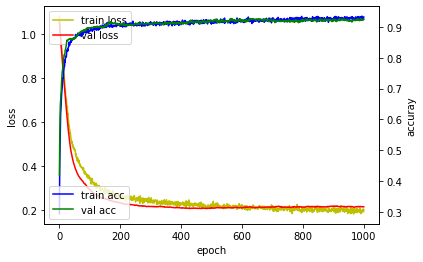

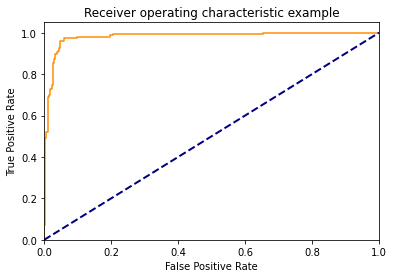


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01875    0.01875    0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.06041667 0.06041667 0.09791667
 0.09791667 0.1875     0.19166667 0.19791667 0.19791667 0.20625
 0.20625    0.27291667 0.27708333 0.29375    0.29791667 0.30625
 0.31041667 0.31666667 0.32083333 0.48958333 0.49375    0.62083333
 0.625      0.6375     0.64166667 0.65416667 0.65416667 0.85625
 0.86041667 0.86875    0.87291667 0.94583333 0.95       0.96875
 0.97708333 1.        ]

tpr : [0.         0.00628931 0.06918239 0.06918239 0.49056604 0.49056604
 0.50943396 0.50943396 0.52201258 0.52201258 0.55345912 0.55345912
 0.6918239  0.6918239  0.69811321 0.6981

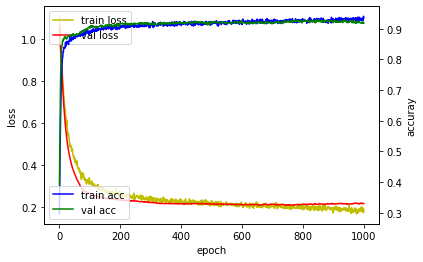

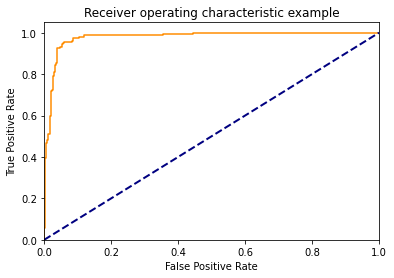


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.03958333 0.03958333 0.04583333 0.04583333 0.05208333
 0.05208333 0.05416667 0.05416667 0.05625    0.05625    0.05833333
 0.05833333 0.08333333 0.08333333 0.08541667 0.08541667 0.10416667
 0.10416667 0.11875    0.11875    0.175      0.17916667 0.24375
 0.24791667 0.35625    0.35625    0.42083333 0.425      0.44375
 0.44375    0.45208333 0.45625    0.47083333 0.475      0.52916667
 0.53333333 0.66666667 0.67083333 0.67916667 0.68333333 0.77083333
 0.775      0.89166667 0.89583333 0.92708333 0.93125    0.94583333
 0.95       0.95416667 0.95833333 1.        ]

tpr : [0.         0.01257862 

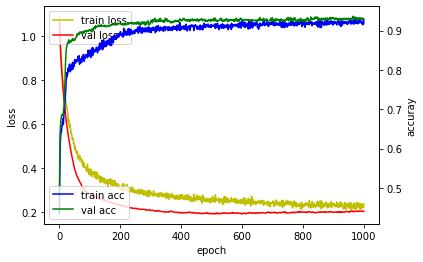

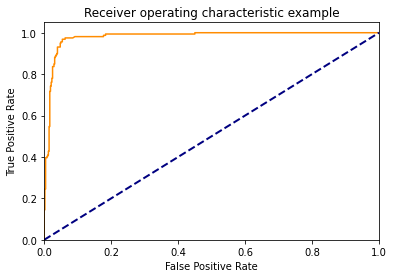


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.03958333
 0.03958333 0.04791667 0.04791667 0.05       0.05       0.05416667
 0.05416667 0.0625     0.0625     0.08541667 0.09166667 0.17708333
 0.17708333 0.18333333 0.18333333 0.1875     0.22916667 0.23333333
 0.32708333 0.33125    0.37708333 0.38125    0.45       0.45
 0.48958333 0.49375    0.63125    0.63541667 0.66041667 0.66458333
 0.72708333 0.73125    0.73541667 0.74791667 0.76666667 1.        ]

tpr : [0.         0.01257862 0.14465409 0.14465409 0.24528302 0.24528302
 0.39622642 0.39622642 0.40251572 0.40251572 0.40880503 0.40880503
 0.42767296 0.42767296 0.54716981 0.54716981 0.71698113 0.7169811

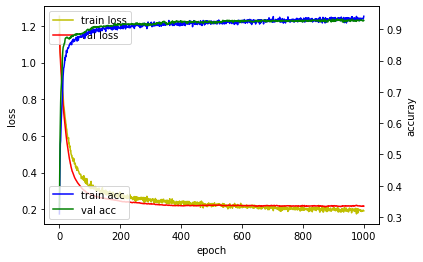

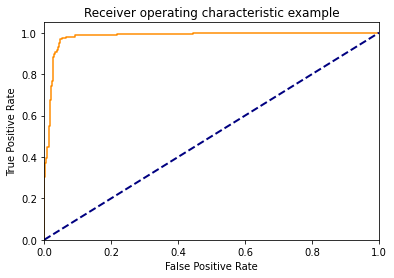


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.0125     0.01458333 0.01458333
 0.01666667 0.01666667 0.01875    0.01875    0.02083333 0.02083333
 0.02291667 0.02291667 0.025      0.025      0.02708333 0.02708333
 0.02916667 0.02916667 0.03333333 0.03333333 0.0375     0.0375
 0.03958333 0.03958333 0.04166667 0.04166667 0.04375    0.04375
 0.04583333 0.04583333 0.04791667 0.04791667 0.05416667 0.05416667
 0.06458333 0.06458333 0.09166667 0.09166667 0.18333333 0.1875
 0.21666667 0.21666667 0.25833333 0.2625     0.27916667 0.28333333
 0.36458333 0.36875    0.375      0.37916667 0.4125     0.41666667
 0.44375    0.44375    0.53541667 0.53958333 0.625      0.62916667
 0.64583333 0.65       0.68333333 0.6875     0.81875    0.82291667
 0.84375    0.84791667 0.85208333 0.85625    0.86041667 0.86458333
 0.875      0.87916667 0.88958333 0.89375    0.90416667 0.9125
 0.91458333 0.92083333 0.925      0.93125    0.94791667 0.95625
 0.960

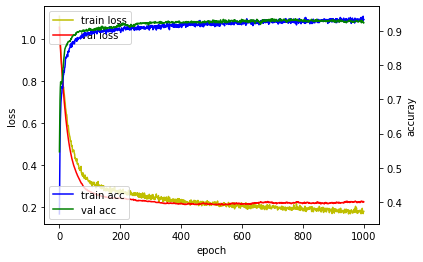

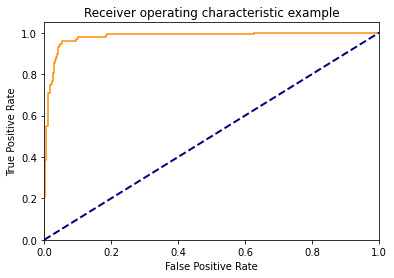


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03333333 0.03333333 0.03541667 0.03541667 0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.05416667 0.05416667 0.09583333 0.09583333 0.10208333
 0.10208333 0.18541667 0.18541667 0.1875     0.1875     0.19166667
 0.24583333 0.25       0.27708333 0.28125    0.36458333 0.36875
 0.57083333 0.575      0.58125    0.58541667 0.62708333 0.62708333
 0.64166667 0.64583333 0.675      0.67916667 0.78125    0.78541667
 0.85       0.85416667 0.875      0.87916667 0.88125    0.88958333
 0.90625    0.9125     0.91458333 0.91875    0.93333333 0.94166667
 0.94375    0.94791667 0.95       0.95416667 0.97708333 0.98541667
 0.9875     0.99166667 1.        ]

tpr : [0.         0.006289

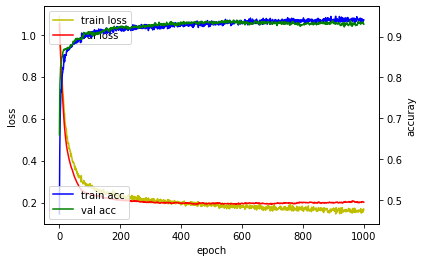

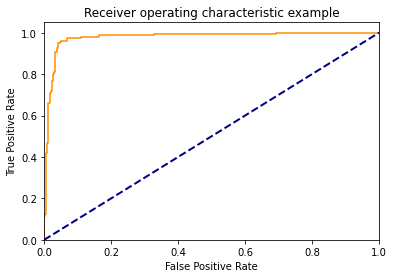


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03125    0.03125    0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04583333 0.04583333 0.05
 0.05       0.06666667 0.06666667 0.11041667 0.11041667 0.1625
 0.1625     0.17916667 0.18333333 0.2625     0.26666667 0.31875
 0.32291667 0.32708333 0.32708333 0.375      0.37916667 0.44166667
 0.44583333 0.4875     0.49166667 0.66875    0.67291667 0.69375
 0.69375    0.70625    0.71041667 0.8125     0.81666667 0.825
 0.82916667 0.85416667 0.85833333 0.88125    0.88541667 0.90208333
 0.90625    0.9125     0.91666667 0.925      0.92916667 0.96041667
 0.96458333 0.97708333 0.98125    0.9875     0.99166667 1.        ]

tpr : [0.         0.00628931 0.11320755 0.11320755 0.12578616 0.12578616
 0.35

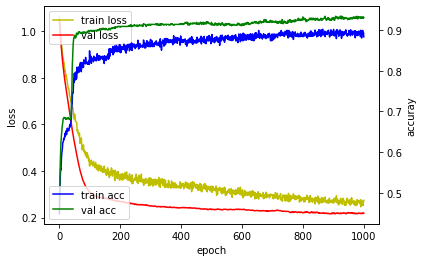

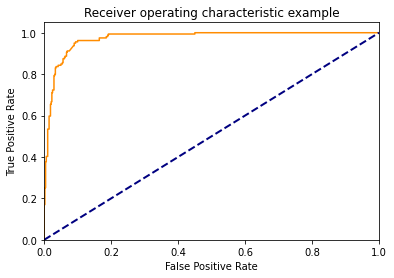


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.01458333
 0.01458333 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.04166667
 0.04166667 0.05       0.05       0.05416667 0.05416667 0.05625
 0.05625    0.06041667 0.06041667 0.0625     0.0625     0.06666667
 0.06666667 0.06875    0.06875    0.075      0.0875     0.08958333
 0.08958333 0.09375    0.09375    0.1        0.1        0.16458333
 0.16458333 0.18541667 0.18541667 0.18958333 0.18958333 0.19166667
 0.19166667 0.19375    0.19791667 0.26875    0.27291667 0.38541667
 0.38958333 0.42916667 0.43333333 0.45       0.45       0.64791667
 0.65208333 0.87916667 0.88333333 0.89166667 0.89583333 0.97916667
 0.98333333 1.        ]

tpr : [0.         0.00628931 0.16981132 0.16981132 0.25157233 0.25157233
 0.37735849 0.37735849 0.40251

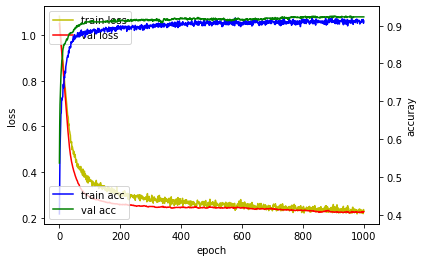

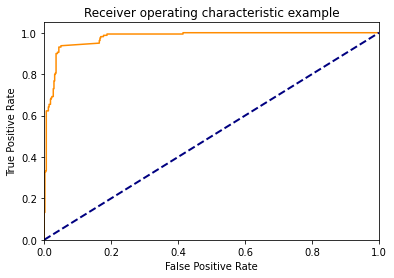


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.0125     0.0125
 0.01458333 0.01458333 0.01875    0.01875    0.02083333 0.02083333
 0.02291667 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667
 0.03125    0.03125    0.03333333 0.03333333 0.03541667 0.03541667
 0.03958333 0.03958333 0.04375    0.04375    0.05       0.05
 0.16458333 0.16458333 0.16666667 0.16666667 0.16875    0.16875
 0.17708333 0.17708333 0.17916667 0.18333333 0.1875     0.1875
 0.24375    0.24791667 0.26458333 0.26875    0.37291667 0.37708333
 0.41458333 0.41458333 0.49375    0.49791667 0.6125     0.61666667
 0.70625    0.71041667 0.775      0.77916667 0.86875    0.87291667
 0.9        0.90416667 0.95       0.95416667 0.96875    0.97291667
 0.98541667 0.98958333 1.        ]

tpr : [0.         0.00628931 0.13207547 0.13207547 0.32704403 0.32704403
 0.33333333 0.33333333 0.62264151 0.62264151 0.62264151 0.64150943
 0.64150943 0.65408805 0.65408

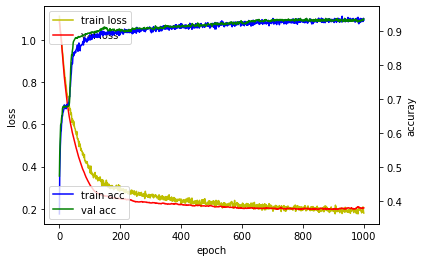

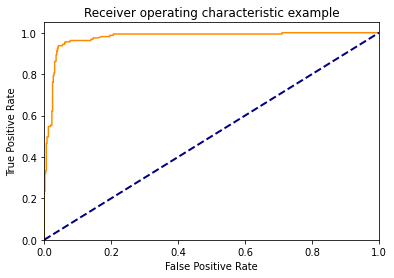


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01875    0.01875    0.02291667 0.02291667
 0.025      0.025      0.02708333 0.02708333 0.02916667 0.02916667
 0.03125    0.03125    0.03541667 0.03541667 0.0375     0.0375
 0.03958333 0.03958333 0.04166667 0.04166667 0.05416667 0.05416667
 0.06041667 0.06041667 0.0625     0.0625     0.07708333 0.07708333
 0.13958333 0.13958333 0.14583333 0.14583333 0.15       0.15416667
 0.16041667 0.17083333 0.19583333 0.19583333 0.20625    0.20625
 0.2625     0.26666667 0.30833333 0.3125     0.31875    0.32291667
 0.38958333 0.39375    0.42291667 0.42708333 0.6375     0.64166667
 0.71041667 0.71041667 0.7875     0.79166667 0.80833333 0.8125
 0.82083333 0.825      0.8375     0.84583333 0.85208333 0.85833333
 0.86875    0.87291667 0.97916667 0.98333333 1.        ]

tpr : [0.         0.00628931 0.2327044  0.2327044  0.32075472 0.32075472
 0.333

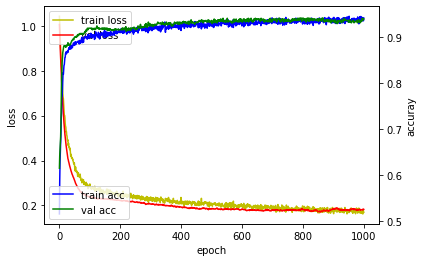

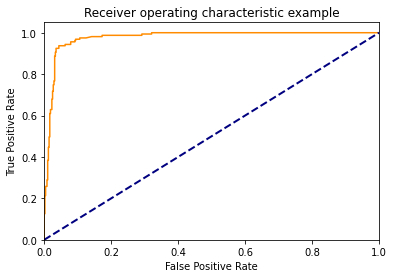


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.04375    0.04375    0.0625
 0.0625     0.07916667 0.07916667 0.09166667 0.09166667 0.09375
 0.09375    0.10625    0.10625    0.125      0.14166667 0.17291667
 0.17291667 0.18541667 0.18958333 0.23958333 0.24375    0.26458333
 0.26875    0.29166667 0.29166667 0.32083333 0.32083333 0.34791667
 0.35208333 0.38125    0.38541667 0.425      0.42916667 0.43541667
 0.43958333 0.71041667 0.71458333 0.7375     0.74166667 0.8125
 0.81666667 0.82708333 0.83125    0.83958333 0.84375    0.84583333
 0.85416667 0.85833333 0.8625     0.86666667 0.875      0.88333333
 0.8875     0.88958333 0.89375    0.9        0.90625    0.90833333
 0.912

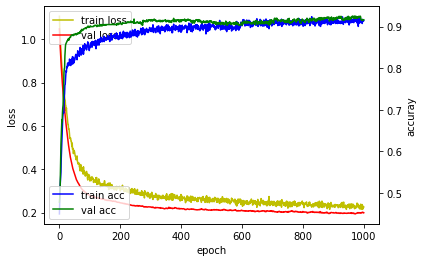

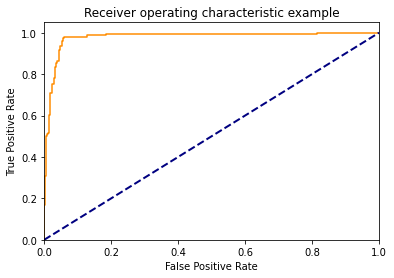


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.03958333
 0.03958333 0.04375    0.04375    0.04791667 0.04791667 0.05416667
 0.05416667 0.05625    0.05625    0.05833333 0.05833333 0.12708333
 0.12708333 0.17083333 0.175      0.18541667 0.18541667 0.23541667
 0.23958333 0.2875     0.29166667 0.44166667 0.44583333 0.65208333
 0.65625    0.7375     0.74166667 0.74791667 0.75208333 0.81458333
 0.81458333 0.84166667 0.85       0.87291667 0.87916667 0.88333333
 0.89375    0.89791667 0.91875    0.92291667 0.94375    0.94791667
 0.975      0.97916667 1.        ]

tpr : [0.         0.00628931 0.16981132 0.16981132 0.3081761  0.3081761
 0.48427673 0.48427673 0.50314465 0.50314465 0.50943396 0.50943396
 0.51572327 0.51572327 0

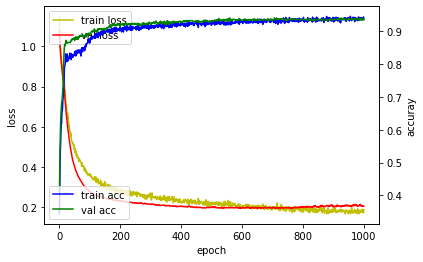

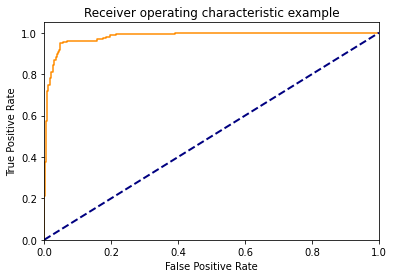


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03541667 0.03541667 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05625    0.05625    0.06666667
 0.06666667 0.15625    0.15625    0.17708333 0.17708333 0.17916667
 0.18333333 0.18333333 0.19583333 0.19583333 0.21458333 0.21458333
 0.26875    0.27291667 0.28333333 0.2875     0.30208333 0.30625
 0.38958333 0.38958333 0.45416667 0.45833333 0.4625     0.46666667
 0.69583333 0.7        0.78958333 0.79375    0.81041667 0.81458333
 0.83333333 0.8375     0.85208333 0.85625    0.85833333 0.8625
 0.87083333 0.87291667 0.87916667 0.89583333 0.9        0.90208333
 0.91041667 0.91666667 0.91875    0.93125    0.9375     0.94166667

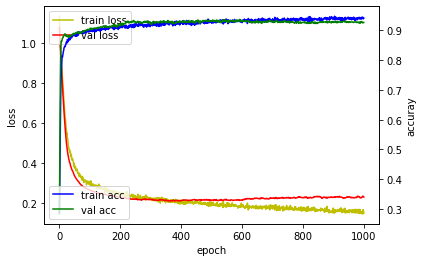

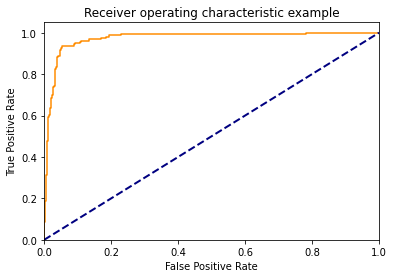


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.08958333 0.08958333 0.09166667 0.09166667 0.10625
 0.10625    0.11041667 0.11041667 0.13333333 0.13333333 0.15416667
 0.15833333 0.17083333 0.17083333 0.18541667 0.18541667 0.19375
 0.19375    0.22916667 0.22916667 0.24166667 0.24583333 0.27708333
 0.28125    0.29583333 0.3        0.36666667 0.37083333 0.44375
 0.44791667 0.45625    0.46041667 0.47291667 0.47708333 0.6
 0.60416667 0.78125    0.78125    0.80416667 0.80833333 0.81041667
 0.81458333 0.83541667 

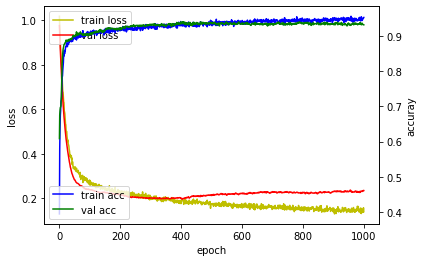

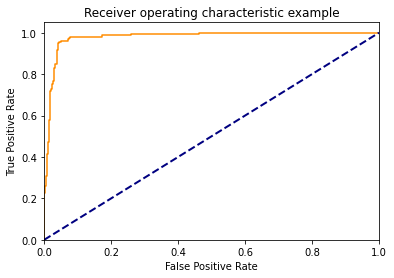


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.04375    0.04375    0.05       0.05       0.07083333
 0.07083333 0.075      0.075      0.07708333 0.07708333 0.14166667
 0.14583333 0.17291667 0.17291667 0.23541667 0.23958333 0.26041667
 0.26041667 0.29166667 0.29583333 0.40833333 0.4125     0.4625
 0.4625     0.46875    0.47291667 0.53958333 0.54583333 0.6125
 0.61666667 0.65208333 0.65625    0.725      0.72916667 0.78125
 0.78541667 0.79166667 0.79583333 0.79791667 0.80208333 0.81458333
 0.81875    0.82708333 0.83125    0.83958333 0.84375    0.84791667
 0.85208333 0.86666667 0.87083333 0.875      0.8875     0.88958333

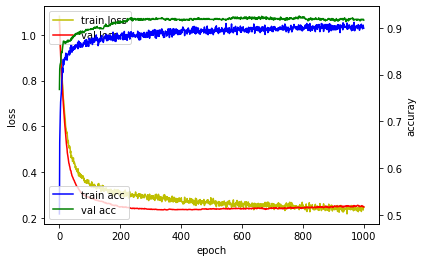

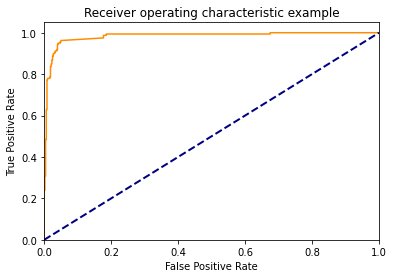


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.03125    0.03125    0.03333333 0.03333333 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04583333
 0.04791667 0.04791667 0.05       0.05       0.17708333 0.17708333
 0.18541667 0.18541667 0.18958333 0.23541667 0.23958333 0.27916667
 0.28333333 0.30416667 0.30833333 0.5        0.50416667 0.56875
 0.57291667 0.61666667 0.62083333 0.675      0.675      0.68541667
 0.68958333 0.79166667 0.79583333 0.80416667 0.80833333 0.81458333
 0.83125    0.8375     0.83958333 0.84375    0.84791667 0.85208333
 0.8625     0.86666667 0.88125    0.88958333 0.89166667 0.89791667
 0.9        0.90833333 0.91458333 0.92083333 0.925      0.92708333
 0.93541667 0.93958333 0.94375    0.95208333 0.95625    0.9625

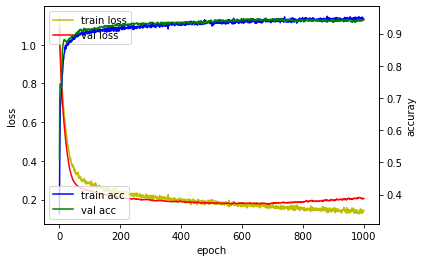

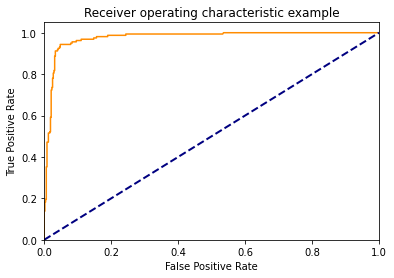


fpr : [0.         0.         0.         0.         0.00208333 0.00208333
 0.00416667 0.00416667 0.00625    0.00625    0.00833333 0.00833333
 0.0125     0.0125     0.01666667 0.01666667 0.01875    0.01875
 0.02083333 0.02083333 0.02291667 0.02291667 0.025      0.025
 0.02708333 0.02708333 0.02916667 0.02916667 0.03125    0.03125
 0.03333333 0.03333333 0.03958333 0.03958333 0.04166667 0.04166667
 0.04583333 0.04583333 0.04791667 0.04791667 0.07916667 0.07916667
 0.08333333 0.08333333 0.09583333 0.09583333 0.11041667 0.11041667
 0.14791667 0.14791667 0.15625    0.15625    0.16041667 0.16458333
 0.18958333 0.18958333 0.20833333 0.2125     0.24375    0.24375
 0.2875     0.29166667 0.34791667 0.35208333 0.47083333 0.475
 0.51666667 0.52083333 0.53333333 0.53541667 0.725      0.72916667
 0.77291667 0.77708333 0.78333333 0.7875     0.79375    0.79791667
 0.80416667 0.80833333 0.81041667 0.82291667 0.84791667 0.85
 0.85625    0.88125    0.8875     0.90208333 0.9125     0.91666667
 0.93958333 0

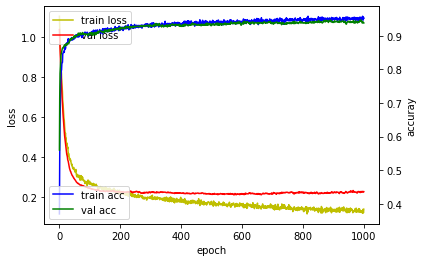

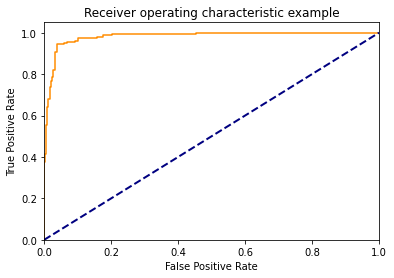


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.03125    0.03125    0.03333333 0.03333333 0.03958333
 0.03958333 0.05833333 0.05833333 0.06875    0.06875    0.09166667
 0.09166667 0.10208333 0.10208333 0.14166667 0.14583333 0.15833333
 0.15833333 0.175      0.175      0.20208333 0.20208333 0.26041667
 0.26458333 0.33541667 0.34375    0.42083333 0.42916667 0.45208333
 0.45208333 0.46041667 0.46458333 0.66875    0.67291667 0.68125
 0.68541667 0.71458333 0.71875    0.72083333 0.725      0.73125
 0.73541667 0.7375     0.74166667 0.74791667 0.75416667 0.75625
 0.76041667 0.76875    0.77708333 0.78541667 0.79166667 0.8
 0.80416667 0.80625    0.81041667 0.82083333 0.825      0.83333333
 0.8375     0.85208333 0.85625    0.8625     0.86458333 0.87291667
 0.8812

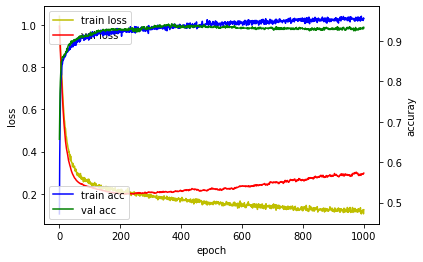

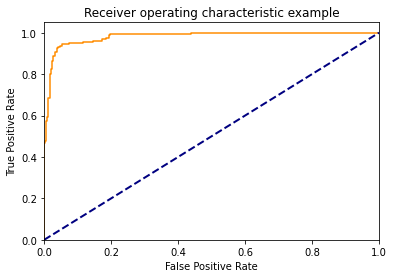


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.03125    0.03125    0.03333333 0.03333333 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04583333
 0.04583333 0.05208333 0.05208333 0.07291667 0.07291667 0.11666667
 0.11666667 0.14583333 0.14583333 0.17291667 0.17291667 0.18333333
 0.18333333 0.1875     0.19166667 0.19375    0.19375    0.19583333
 0.19583333 0.21666667 0.22083333 0.30208333 0.30625    0.31875
 0.32291667 0.425      0.42916667 0.4375     0.4375     0.47083333
 0.475      0.72708333 0.73125    0.76458333 0.76875    0.79166667
 0.79791667 0.81041667 0.82291667 0.8375     0.84166667 0.85416667
 0.85833333 0.86041667 0.86458333 0.87916667 0.88541667 0.89791667
 0.90208333 0.90625    0.91041667 0.92083333 0.925      0.92708333

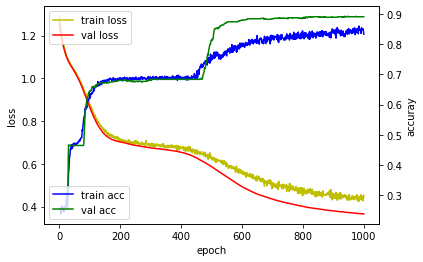

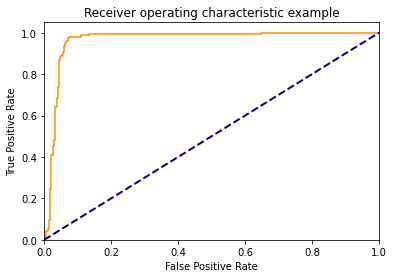


fpr : [0.         0.         0.00208333 0.00208333 0.00416667 0.00416667
 0.00625    0.00625    0.0125     0.0125     0.01458333 0.01458333
 0.01666667 0.01666667 0.01875    0.01875    0.02083333 0.02083333
 0.025      0.025      0.02708333 0.02708333 0.02916667 0.02916667
 0.03125    0.03125    0.03541667 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04791667
 0.04791667 0.05208333 0.05208333 0.05625    0.05625    0.05833333
 0.05833333 0.06041667 0.06041667 0.0625     0.0625     0.06458333
 0.06458333 0.07083333 0.07083333 0.07291667 0.07291667 0.11041667
 0.11041667 0.13333333 0.13333333 0.32916667 0.33333333 0.33958333
 0.34375    0.46041667 0.46458333 0.51666667 0.52083333 0.52291667
 0.52708333 0.53541667 0.53958333 0.60416667 0.60833333 0.64791667
 0.64791667 1.        ]

tpr : [0.         0.00628931 0.00628931 0.01257862 0.01257862 0.03773585
 0.03773585 0.04402516 0.04402516 0.05031447 0.05031447 0.09433962
 0.09433962 0.18867925 0

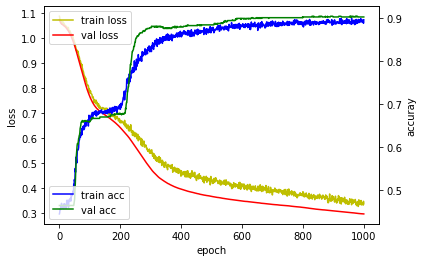

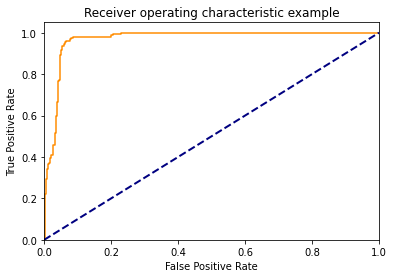


fpr : [0.         0.00208333 0.00208333 0.00416667 0.00416667 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.025      0.025      0.02708333 0.02708333 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.05416667 0.05416667 0.05833333 0.05833333 0.0625
 0.0625     0.06458333 0.06458333 0.07708333 0.07708333 0.08125
 0.08125    0.08541667 0.08541667 0.2        0.2        0.20625
 0.20625    0.22916667 0.22916667 0.23125    0.23541667 0.27708333
 0.28125    0.3375     0.34166667 0.36041667 0.36458333 0.54583333
 0.55       0.625      0.62916667 0.69583333 0.7        0.76458333
 0.76875    1.        ]

tpr : [0.         0.         0.22012579 0.22012579 0.25157233 0.25157233
 0.29559748 0.29559748 0.33962264 0.33962264

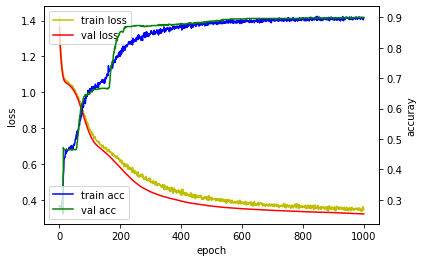

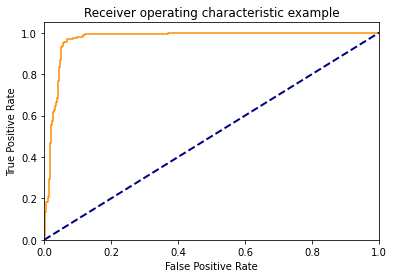


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.01041667 0.01041667 0.0125     0.0125     0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.02708333 0.02708333 0.02916667
 0.02916667 0.03333333 0.03333333 0.03541667 0.03541667 0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.05625    0.05625    0.06041667 0.06041667 0.06875
 0.06875    0.08541667 0.08541667 0.09791667 0.09791667 0.11458333
 0.11458333 0.12083333 0.12083333 0.22708333 0.23125    0.3
 0.30416667 0.32708333 0.33125    0.3625     0.36666667 0.36875
 0.36875    0.46666667 0.47083333 0.57708333 0.58125    0.66041667
 0.66458333 0.91458333 0.91875    0.94166667 0.94583333 1.        ]

tpr : [0.         0.00628931 0.01886792 0.01886792 0.13207547 0.13207547
 0.18238994 0.18238994 0.18867925 0.18867925 0.20754717 0.20754

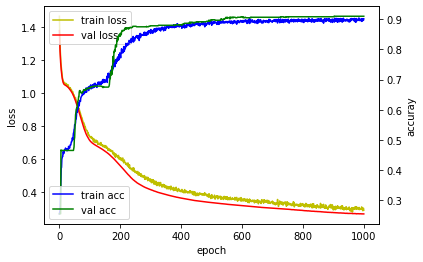

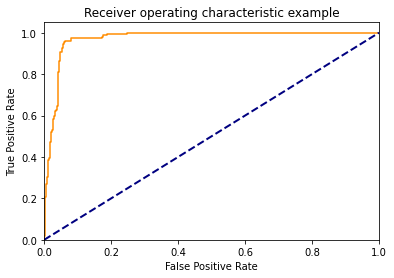


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05208333 0.05208333 0.05625
 0.05625    0.06041667 0.06041667 0.0625     0.0625     0.08125
 0.08125    0.17291667 0.17291667 0.175      0.175      0.1875
 0.1875     0.19375    0.19791667 0.24583333 0.24583333 0.26666667
 0.27083333 0.3        0.30416667 0.45625    0.46041667 0.51458333
 0.51875    0.68125    0.68541667 0.72291667 0.72708333 0.79166667
 0.79583333 0.90208333 0.90625    1.        ]

tpr : [0.         0.00628931 0.01886792 0.01886792 0.20754717 0.20754717
 0.2327044  0.2

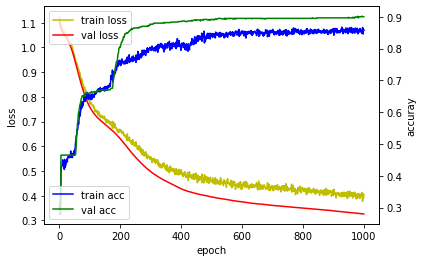

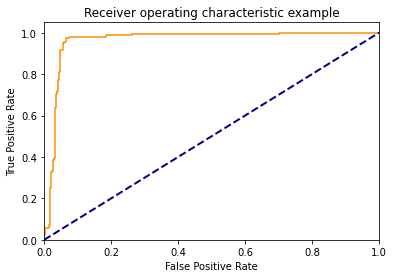


fpr : [0.         0.         0.         0.00208333 0.00208333 0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.04166667
 0.04166667 0.04375    0.04375    0.04583333 0.04583333 0.04791667
 0.04791667 0.05625    0.05625    0.05833333 0.05833333 0.06458333
 0.06458333 0.07291667 0.07291667 0.18333333 0.18333333 0.25
 0.25416667 0.2625     0.2625     0.32916667 0.33333333 0.33541667
 0.33958333 0.41875    0.42291667 0.45625    0.46041667 0.61875
 0.62291667 0.69166667 0.69583333 0.70208333 0.70208333 1.        ]

tpr : [0.         0.00628931 0.02515723 0.02515723 0.05660377 0.05660377
 0.06918239 0.06918239 0.18867925 0.18867925 0.25157233 0.25157233
 0.32704403 0.32704403 0.33333333 0.33333333 0.36477987 0.36477987
 0.3836478  0.3836478  0.39622642 0.39622642 0.54716981 

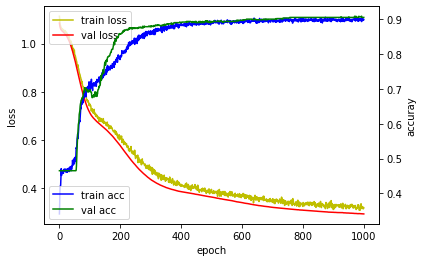

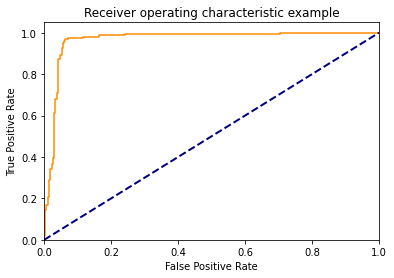


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.01458333
 0.01458333 0.01875    0.01875    0.02291667 0.02291667 0.025
 0.025      0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.04791667 0.04791667 0.05208333 0.05208333 0.05625
 0.05625    0.06041667 0.06041667 0.0625     0.0625     0.07083333
 0.07083333 0.11458333 0.11458333 0.1625     0.1625     0.21666667
 0.22083333 0.24166667 0.24166667 0.25416667 0.25833333 0.32291667
 0.32708333 0.44583333 0.45       0.45416667 0.45833333 0.67083333
 0.675      0.7        0.70416667 0.70416667 0.75625    0.76041667
 1.        ]

tpr : [0.         0.00628931 0.01886792 0.01886792 0.14465409 0.14465409
 0.1509434  0.1509434  0.16981132 0.16981132 0.20754717 0.20754717
 0.28930818 0.28930818 0.33962264 0.33962264 0.36477987 0.36477987
 0.39622642 0.39622642 0.61006289 0.6100628

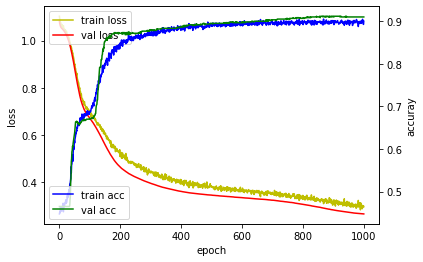

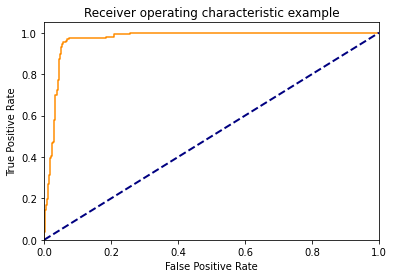


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.02916667 0.02916667 0.03333333 0.03333333 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04375
 0.04375    0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.05416667 0.05416667 0.05625    0.05625    0.06458333
 0.06458333 0.06875    0.06875    0.07291667 0.07291667 0.18333333
 0.18333333 0.20416667 0.20833333 0.20833333 0.25625    0.25625
 0.32916667 0.33333333 0.35       0.35416667 0.55625    0.56041667
 0.5875     0.59166667 0.69791667 0.70208333 0.70833333 0.7125
 1.        ]

tpr : [0.         0.00628931 0.03773585 0.03773585 0.14465409 0.14465409
 0.16981132 0.16981132 0.19496855 0.19496855 0.22641509 0.22641509
 0.27044025 0.27044025 0.31446541 0.31446541 0.32704403 0.3

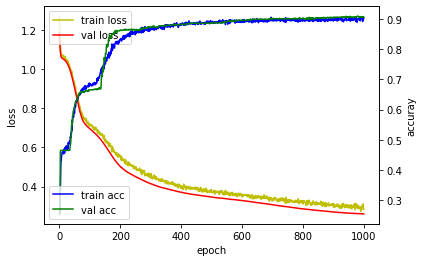

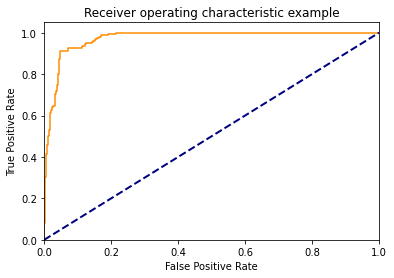


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.0375     0.0375     0.04166667 0.04166667 0.04375
 0.04375    0.04583333 0.04583333 0.07083333 0.07083333 0.1125
 0.1125     0.12291667 0.12291667 0.125      0.125      0.14166667
 0.14166667 0.14583333 0.14583333 0.15208333 0.15208333 0.15833333
 0.15833333 0.1625     0.1625     0.16875    0.16875    0.19166667
 0.19166667 0.20416667 0.20833333 0.21458333 0.21458333 0.26666667
 0.27083333 0.32916667 0.33333333 0.45416667 0.45833333 0.49375
 0.49791667 0.55208333 0.55625    0.68125    0.68541667 0.725
 0.72916667 0.87291667 0.87708333 1.        ]

tpr : [0.         0.00628931 0.08176101 0.08176101 0.30188679 0.30188679
 0.3836478  0.383647

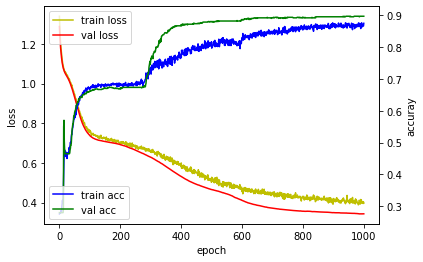

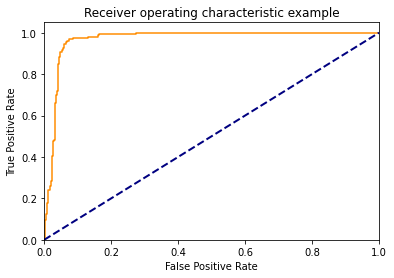


fpr : [0.         0.00208333 0.00208333 0.00416667 0.00416667 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.04166667
 0.04166667 0.04375    0.04375    0.04791667 0.04791667 0.05208333
 0.05208333 0.05625    0.05625    0.06041667 0.06041667 0.06458333
 0.06458333 0.06875    0.06875    0.07291667 0.07291667 0.0875
 0.0875     0.13125    0.13125    0.16041667 0.16041667 0.16458333
 0.16458333 0.24791667 0.25208333 0.27291667 0.27291667 0.3125
 0.31666667 0.32916667 0.33333333 0.40208333 0.40625    0.46458333
 0.46875    0.60416667 0.60833333 0.68958333 0.69375    0.92916667
 0.93333333 1.        ]

tpr : [0.         0.         0.09433962 0.09433962 0.11949686 0.11949686
 0.12578616 0.12578616 0.17610063 0.176

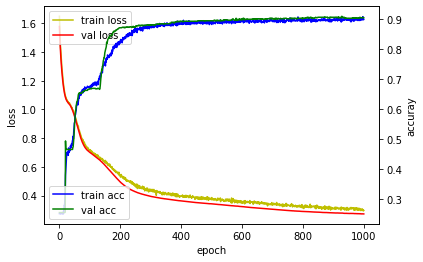

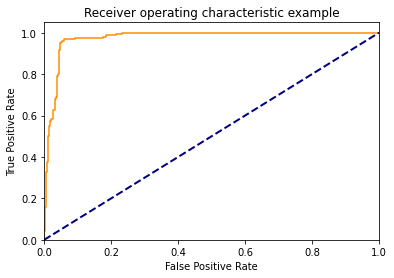


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.025
 0.025      0.02708333 0.02708333 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.05833333 0.05833333 0.09166667 0.09166667 0.175
 0.175      0.18333333 0.18333333 0.18958333 0.19375    0.21458333
 0.21458333 0.23333333 0.23333333 0.28125    0.28541667 0.30416667
 0.30833333 0.46875    0.47291667 0.475      0.47916667 0.67291667
 0.67708333 0.71041667 0.71458333 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.1572327  0.1572327
 0.22641509 0.22641509 0.32704403 0.32704403 0.37735849 0.37735849
 0.41509434 0

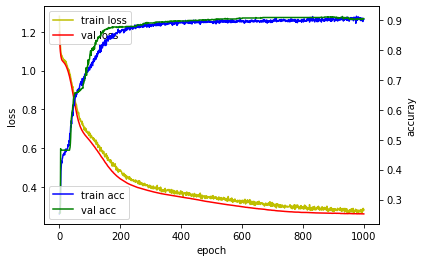

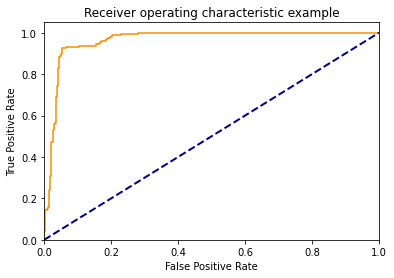


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00833333
 0.00833333 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.02083333 0.02083333 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03541667
 0.03541667 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.04375    0.04375    0.04583333 0.04583333 0.05
 0.05       0.05208333 0.05208333 0.06458333 0.06458333 0.10416667
 0.10416667 0.15416667 0.15416667 0.16458333 0.16458333 0.16875
 0.16875    0.18333333 0.18333333 0.1875     0.18958333 0.18958333
 0.19583333 0.19583333 0.20208333 0.20208333 0.22916667 0.22916667
 0.28125    0.28125    0.31875    0.32291667 0.33958333 0.34375
 0.55       0.55416667 0.58333333 0.5875     0.72291667 0.72708333
 0.75416667 0.75833333 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.14465409 0.14465409
 0.1509434  0.1509434  0.1572327  0.1572327  0.23899371 0.23899371
 0.3081761  0.3081761  0.

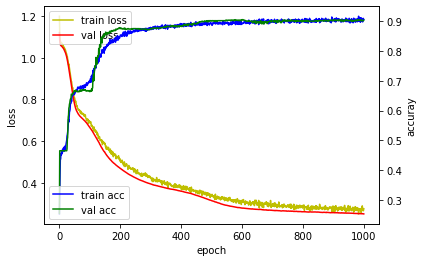

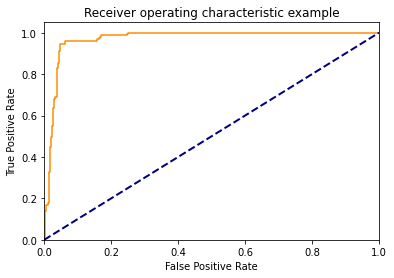


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.01041667 0.0125     0.0125     0.01458333 0.01458333
 0.01666667 0.01666667 0.01875    0.01875    0.02083333 0.02083333
 0.02291667 0.02291667 0.025      0.025      0.02708333 0.02708333
 0.02916667 0.02916667 0.03125    0.03125    0.0375     0.0375
 0.03958333 0.03958333 0.04166667 0.04166667 0.04375    0.04375
 0.04583333 0.04583333 0.04791667 0.04791667 0.0625     0.0625
 0.15625    0.15625    0.16458333 0.16458333 0.16666667 0.16666667
 0.16875    0.16875    0.18125    0.18541667 0.24583333 0.24583333
 0.25       0.25       0.27916667 0.28333333 0.33541667 0.33958333
 0.47708333 0.48125    0.53958333 0.54375    0.67083333 0.675
 0.72083333 0.725      0.84166667 0.84583333 0.93541667 0.93958333
 1.        ]

tpr : [0.         0.00628931 0.01257862 0.01257862 0.13836478 0.13836478
 0.16981132 0.16981132 0.16981132 0.17610063 0.17610063 0.32704403
 0.32704403 0.38993711 0.38993711 0.44654088 0.4465408

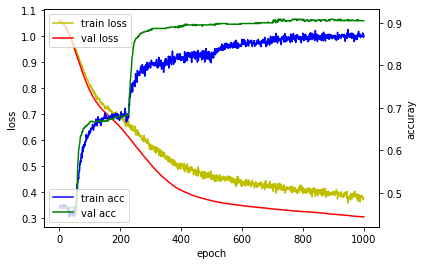

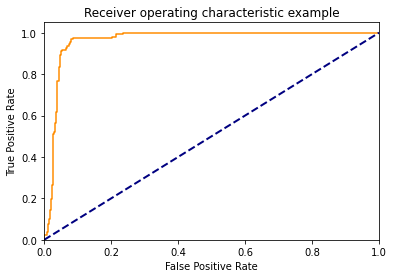


fpr : [0.         0.         0.         0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.025      0.02708333 0.02708333
 0.02916667 0.02916667 0.03125    0.03125    0.03541667 0.03541667
 0.0375     0.0375     0.03958333 0.03958333 0.04375    0.04375
 0.04583333 0.04583333 0.05       0.05       0.05208333 0.05208333
 0.06458333 0.06458333 0.06666667 0.06666667 0.07291667 0.07291667
 0.07708333 0.07708333 0.07916667 0.07916667 0.08541667 0.08541667
 0.20208333 0.20208333 0.21458333 0.21458333 0.21666667 0.22083333
 0.23541667 0.23541667 0.30833333 0.3125     0.40833333 0.4125
 0.42291667 0.42708333 0.45       0.45416667 0.66875    0.67291667
 0.7        0.70416667 0.98333333 0.9875     1.        ]

tpr : [0.         0.00628931 0.02515723 0.02515723 0.03773585 0.03773585
 0.06289308 0.06289308 0.0754717  0.0754717  0.10062893 0.1006289

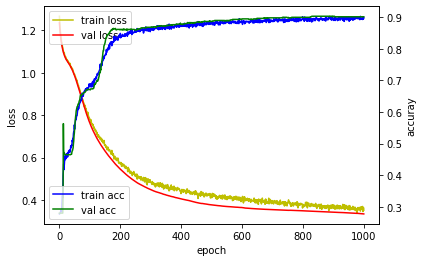

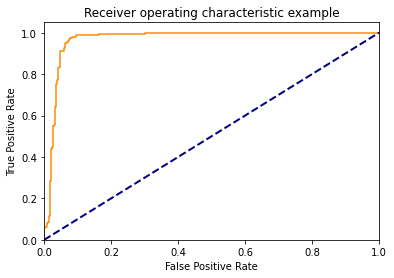


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00833333
 0.00833333 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05833333 0.05833333 0.06041667
 0.06041667 0.0625     0.0625     0.06666667 0.06666667 0.07083333
 0.07083333 0.075      0.075      0.07708333 0.07708333 0.08333333
 0.08333333 0.09375    0.09375    0.16458333 0.16458333 0.18958333
 0.19375    0.3        0.3        0.3125     0.31666667 0.31875
 0.32291667 0.39791667 0.40208333 0.50416667 0.50833333 0.56875
 0.57291667 0.67291667 0.67708333 0.69375    0.69791667 0.97916667
 0.98333333 1.        ]

tpr : [0.         0.00628931 0.05660377 0.05660377 0.06289308 0.06289308
 0.08176101 0.08176101 0.08805031 0.0

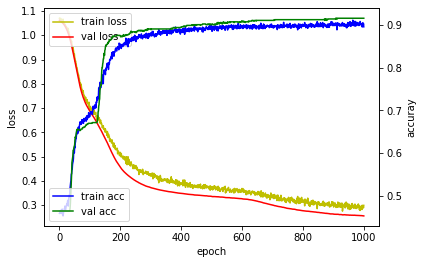

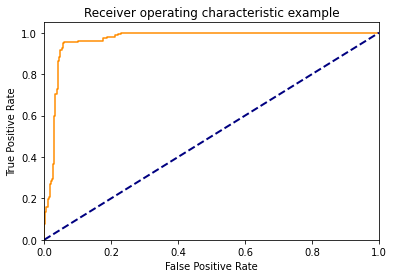


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.0375
 0.0375     0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05208333 0.05208333 0.05625
 0.05625    0.05833333 0.05833333 0.1        0.1        0.175
 0.175      0.1875     0.1875     0.2        0.20416667 0.21041667
 0.21041667 0.22083333 0.22083333 0.22916667 0.22916667 0.28541667
 0.28958333 0.40625    0.41041667 0.41875    0.42291667 0.59583333
 0.6        0.62291667 0.62708333 0.69166667 0.69583333 1.        ]

tpr : [0.         0.00628931 0.0754717  0.0754717  0.13207547 0.13207547
 0.1572327  0.1572327  0.19496855 0.19496855 0.20754717 0.20754717
 0.21383648 0.21383648 0.27044025 0.27044025 0.28301887 0.2

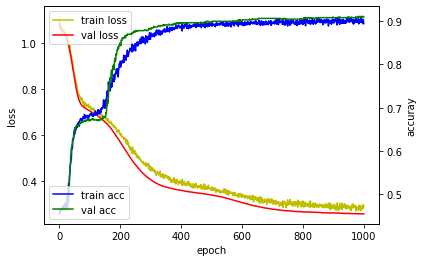

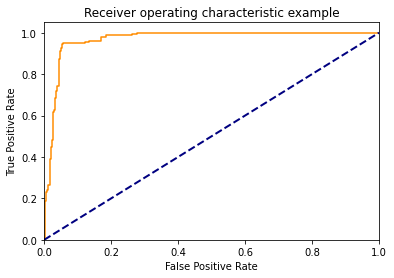


fpr : [0.         0.         0.00208333 0.00208333 0.00416667 0.00416667
 0.00625    0.00625    0.00833333 0.00833333 0.01041667 0.01041667
 0.0125     0.0125     0.01666667 0.01666667 0.01875    0.01875
 0.02083333 0.02083333 0.02291667 0.02291667 0.025      0.025
 0.02708333 0.02708333 0.02916667 0.02916667 0.03125    0.03125
 0.03333333 0.03333333 0.03541667 0.03541667 0.03958333 0.03958333
 0.04375    0.04375    0.04583333 0.04583333 0.04791667 0.04791667
 0.05       0.05       0.05208333 0.05208333 0.05416667 0.05416667
 0.05625    0.05625    0.12083333 0.12083333 0.13333333 0.13333333
 0.16875    0.16875    0.17083333 0.17083333 0.18333333 0.18333333
 0.20208333 0.20625    0.25416667 0.25833333 0.2625     0.2625
 0.26666667 0.27083333 0.27708333 0.27708333 0.30833333 0.3125
 0.52708333 0.53125    0.5375     0.54166667 0.60833333 0.6125
 0.88958333 0.89375    1.        ]

tpr : [0.         0.00628931 0.00628931 0.18867925 0.18867925 0.22641509
 0.22641509 0.2327044  0.2327044  0.

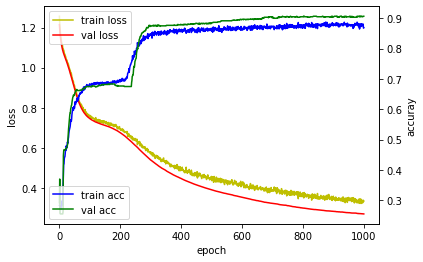

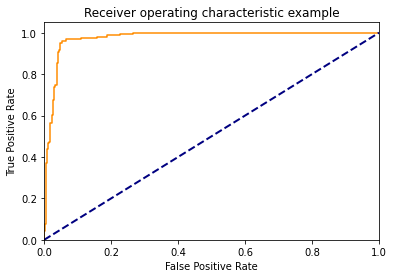


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04375
 0.04375    0.04583333 0.04583333 0.04791667 0.04791667 0.05208333
 0.05208333 0.06458333 0.06458333 0.11041667 0.11041667 0.15833333
 0.15833333 0.17916667 0.18333333 0.1875     0.1875     0.225
 0.225      0.23541667 0.23958333 0.26458333 0.26458333 0.27916667
 0.28333333 0.29583333 0.3        0.51041667 0.51458333 0.58958333
 0.59375    0.70416667 0.70833333 0.95       0.95416667 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.0754717  0.0754717
 0.18867925 0.18867925 0.37106918 0.37106918 0.44025157 0.44025157
 0.46540881 0.46540881 0.47169811 0.47169811 0.47798742 0.47798742


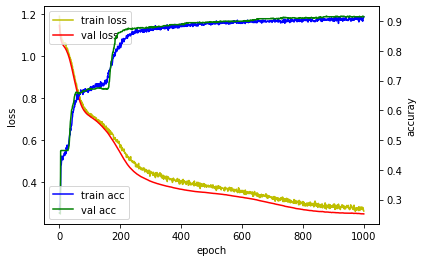

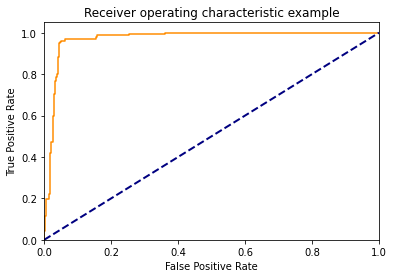


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.01458333 0.01458333 0.01666667 0.01666667 0.02083333
 0.02083333 0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04791667
 0.04791667 0.05       0.05       0.0625     0.0625     0.15416667
 0.15416667 0.15833333 0.15833333 0.18541667 0.18958333 0.25416667
 0.25416667 0.2625     0.26666667 0.27708333 0.28125    0.33958333
 0.34375    0.36041667 0.36041667 0.50833333 0.5125     0.59791667
 0.60208333 0.7        0.70416667 0.94375    0.94791667 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.11320755 0.11320755
 0.19496855 0.19496855 0.22012579 0.22012579 0.42138365 0.42138365
 0.47169811 0.47169811 0.59748428 0.59748428 0.70440252 0.70440252
 0.71069182 0.71069182 0.7672956  0.7672956  0.78616352 0.78616352
 0.79874214 0.79874214 0.88050314 0.88050314 0.949685

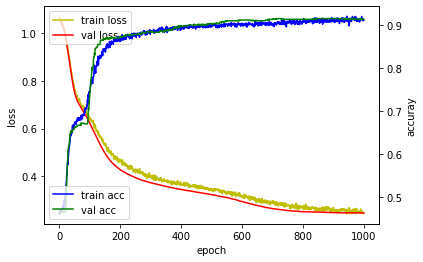

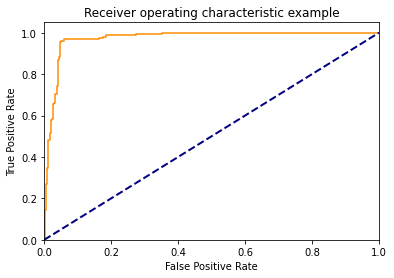


fpr : [0.         0.00208333 0.00208333 0.00416667 0.00416667 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03333333 0.03333333 0.0375
 0.0375     0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.05       0.05       0.05833333 0.05833333 0.1625
 0.1625     0.175      0.175      0.18333333 0.18333333 0.19166667
 0.19583333 0.23333333 0.2375     0.27291667 0.27291667 0.30416667
 0.30833333 0.31666667 0.32083333 0.35208333 0.35208333 0.5125
 0.51666667 0.63333333 0.6375     0.68125    0.68541667 0.975
 0.97916667 1.        ]

tpr : [0.         0.         0.14465409 0.14465409 0.2327044  0.2327044
 0.27044025 0.27044025 0.34591195 0.34591195 0.42138365 0.42138365
 0.48427673 0.48427673 0.50943396 0.50943396 0.51572327 0.51572327
 0.57861635 0.57861635 0.58490566 0.58490566 0.64

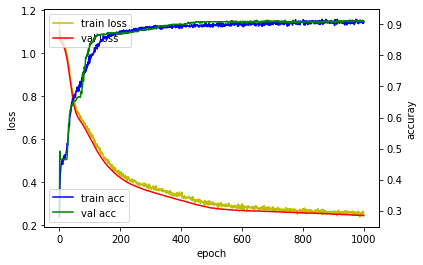

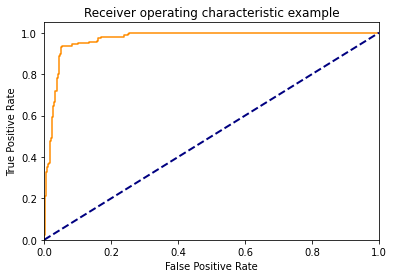


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05416667
 0.05416667 0.08333333 0.08333333 0.10208333 0.10208333 0.13333333
 0.13333333 0.15625    0.15625    0.16041667 0.16041667 0.17083333
 0.17083333 0.2        0.20416667 0.23958333 0.23958333 0.25
 0.25       0.25416667 0.25416667 0.25833333 0.2625     0.27083333
 0.275      0.32291667 0.32708333 0.55208333 0.55625    0.725
 0.72916667 0.74791667 0.75208333 1.        ]

tpr : [0.         0.00628931 0.02515723 0.02515723 0.21383648 0.21383648
 0.28301887 0.28301887 0.327

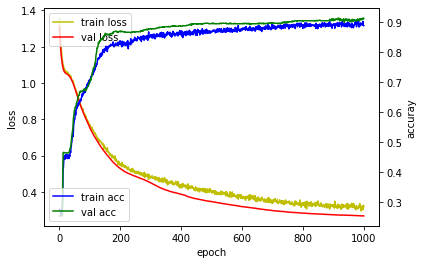

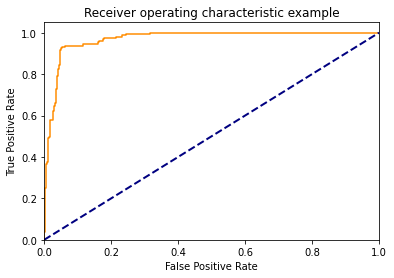


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.025      0.025
 0.02708333 0.02708333 0.02916667 0.02916667 0.03333333 0.03333333
 0.03541667 0.03541667 0.0375     0.0375     0.03958333 0.03958333
 0.04166667 0.04166667 0.04375    0.04375    0.04583333 0.04583333
 0.04791667 0.04791667 0.05       0.05       0.05208333 0.05208333
 0.0625     0.0625     0.11458333 0.11458333 0.16041667 0.16041667
 0.16458333 0.16458333 0.175      0.175      0.17916667 0.17916667
 0.20625    0.21041667 0.21458333 0.21458333 0.23333333 0.23333333
 0.24375    0.24375    0.31458333 0.31458333 0.33125    0.33541667
 0.34166667 0.34583333 0.36041667 0.36458333 0.51041667 0.51458333
 0.60416667 0.60833333 0.63541667 0.63958333 0.68958333 0.69375
 0.86041667 0.86458333 1.        ]

tpr : [0.         0.0062893

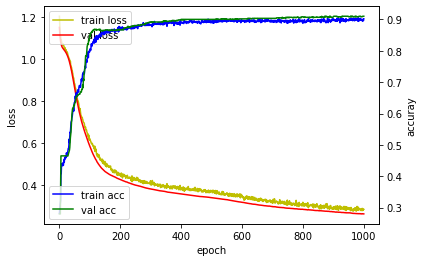

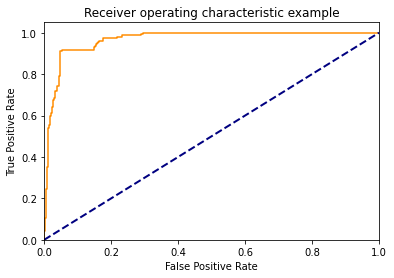


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03541667 0.03958333 0.03958333 0.04375    0.04375
 0.04583333 0.04583333 0.04791667 0.04791667 0.05208333 0.05208333
 0.15       0.15       0.15208333 0.15208333 0.15416667 0.15416667
 0.15625    0.15625    0.16041667 0.16041667 0.1625     0.1625
 0.175      0.175      0.17916667 0.21875    0.21875    0.23333333
 0.23333333 0.2375     0.24166667 0.26458333 0.26875    0.27708333
 0.28125    0.28958333 0.28958333 0.29375    0.29375    0.55
 0.55416667 0.63125    0.63541667 0.675      0.67916667 0.69166667
 0.69583333 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.10691824 0.10691824
 0.1509434  0.1509434  0.24528302 0.2452

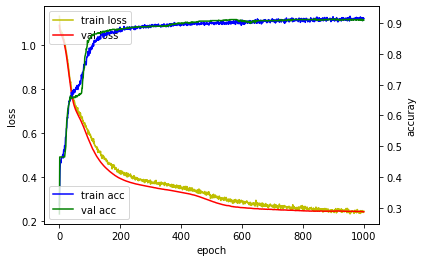

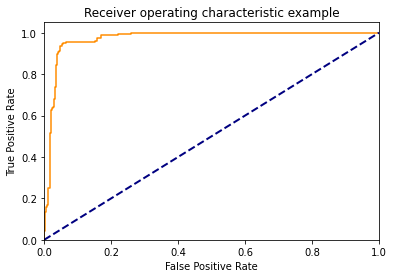


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.04375    0.04375    0.04583333 0.04583333 0.04791667
 0.04791667 0.05416667 0.05416667 0.05625    0.05625    0.06458333
 0.06458333 0.15208333 0.15208333 0.15625    0.15625    0.15833333
 0.15833333 0.16875    0.16875    0.18125    0.18541667 0.22083333
 0.22083333 0.26041667 0.26041667 0.27916667 0.28333333 0.325
 0.32916667 0.42708333 0.43125    0.55833333 0.5625     0.72083333
 0.725      0.73541667 0.73958333 1.        ]

tpr : [0.         0.00628931 0.04402516 0.04402516 0.13207547 0.13207547
 0.1572327  0.1572327  0.16981132 0.16981132 0.19496855 0.19496855
 0.25157233 0.

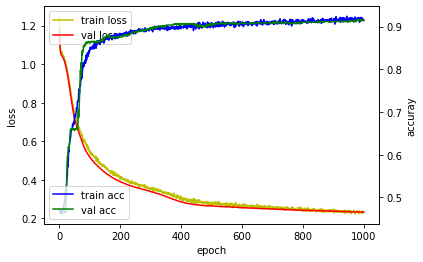

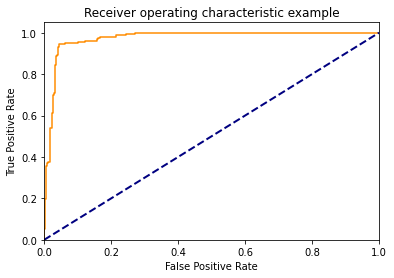


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.03958333 0.03958333 0.04166667 0.04166667 0.04375
 0.04375    0.0625     0.0625     0.10208333 0.10208333 0.12291667
 0.12291667 0.15833333 0.15833333 0.16041667 0.16041667 0.16666667
 0.16666667 0.17083333 0.175      0.21458333 0.21458333 0.24375
 0.24375    0.2625     0.26666667 0.27083333 0.27083333 0.31875
 0.32291667 0.33541667 0.33958333 0.49375    0.49791667 0.50416667
 0.50833333 0.625      0.62916667 0.97291667 0.97708333 1.        ]

tpr : [0.         0.00628931 0.05031447 0.05031447 0.19496855 0.19496855
 0.23899371 0.23899371 0.35849057 0.35849057 0.37106918 0.37106918
 0.37735849 0.37735849 0.52830189 0.52830189 0.5408805  0.54

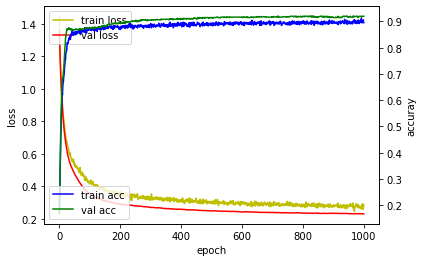

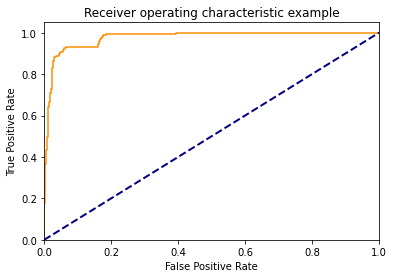


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03541667
 0.03541667 0.03958333 0.04375    0.04375    0.04791667 0.04791667
 0.05625    0.05625    0.05833333 0.05833333 0.06458333 0.06458333
 0.16041667 0.16041667 0.1625     0.1625     0.16458333 0.16458333
 0.16666667 0.16666667 0.17083333 0.17083333 0.17291667 0.17291667
 0.17708333 0.17708333 0.18541667 0.18541667 0.1875     0.19166667
 0.27083333 0.275      0.28125    0.28541667 0.31041667 0.31458333
 0.39375    0.39375    0.55833333 0.5625     0.61458333 0.61875
 0.72708333 0.73125    1.        ]

tpr : [0.         0.00628931 0.17610063 0.17610063 0.36477987 0.36477987
 0.43396226 0.43396226 0.49685535 0.49685535 0.53459119 0.53459119
 0.64150943 0.64150943 0.666

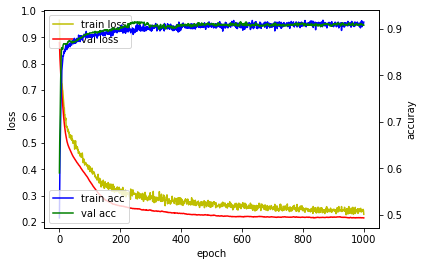

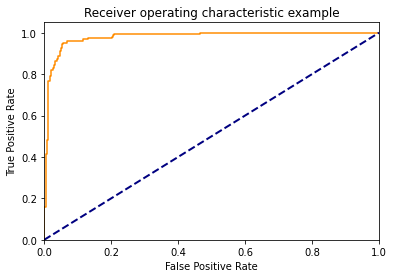


fpr : [0.         0.         0.         0.00416667 0.00416667 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.025      0.025      0.02916667 0.02916667 0.03125
 0.03125    0.0375     0.0375     0.04166667 0.04166667 0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.05625    0.05625    0.06666667 0.06666667 0.11458333
 0.11458333 0.13125    0.13125    0.17708333 0.18125    0.20208333
 0.20208333 0.20416667 0.20416667 0.20833333 0.20833333 0.275
 0.27916667 0.34583333 0.35       0.36666667 0.37083333 0.425
 0.42916667 0.46666667 0.46666667 0.56458333 0.56875    0.70208333
 0.70625    1.        ]

tpr : [0.         0.00628931 0.1572327  0.1572327  0.32704403 0.32704403
 0.41509434 0.41509434 0.48427673 0.48427673 0.49685535 0.49685535
 0.7672956  0.7672956  0.78616352 0.78616352 0.79245283 0.79245283
 0.81761006 0.81761006 0.83018868 0.83018868

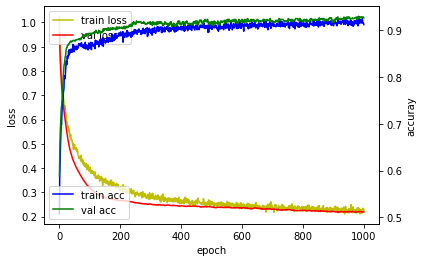

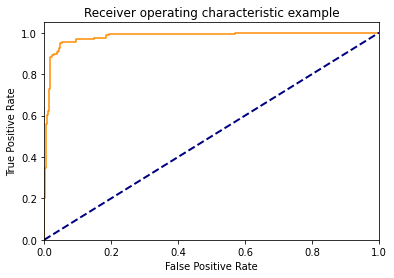


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.02916667 0.02916667 0.03125
 0.03541667 0.0375     0.0375     0.04166667 0.04166667 0.04375
 0.04375    0.04583333 0.04583333 0.04791667 0.04791667 0.05208333
 0.05208333 0.09583333 0.09583333 0.15       0.15       0.175
 0.17916667 0.18333333 0.18333333 0.18541667 0.18541667 0.19375
 0.19375    0.3        0.30416667 0.34166667 0.34583333 0.53125
 0.53541667 0.54375    0.54791667 0.55       0.55416667 0.56875
 0.56875    0.725      0.72916667 0.90208333 0.90625    0.96875
 0.97291667 1.        ]

tpr : [0.         0.00628931 0.20125786 0.20125786 0.34591195 0.34591195
 0.40880503 0.40880503 0.55974843 0.55974843 0.60377358 0.60377358
 0.62264151 0.62264151 0.72955975 0.72955975 0.8427673  0.8427673
 0.88050314 0.88050314 0.89308176 0.89308176 0.8993

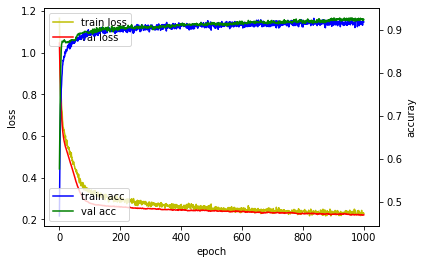

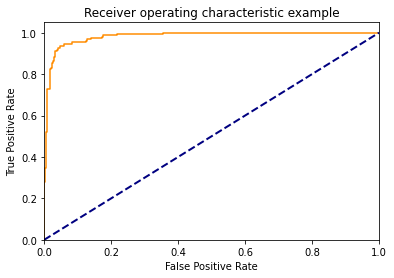


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.01666667 0.01666667 0.01875    0.01875    0.02083333 0.02083333
 0.02291667 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667
 0.03125    0.03125    0.03958333 0.03958333 0.04166667 0.04166667
 0.04583333 0.04583333 0.05833333 0.05833333 0.08333333 0.08333333
 0.125      0.125      0.12916667 0.12916667 0.13958333 0.13958333
 0.17291667 0.17291667 0.175      0.175      0.21041667 0.21458333
 0.21875    0.21875    0.25416667 0.25833333 0.27708333 0.28125
 0.33958333 0.34375    0.35416667 0.35416667 0.52291667 0.52708333
 0.61458333 0.61875    0.71875    0.72291667 0.93125    0.93541667
 0.94375    0.94791667 1.        ]

tpr : [0.         0.00628931 0.27672956 0.27672956 0.34591195 0.34591195
 0.50943396 0.50943396 0.52201258 0.52201258 0.72955975 0.72955975
 0.72955975 0.77987421 0.77987421 0.82389937 0.82389937 0.83018868
 0.83018868 0.855345

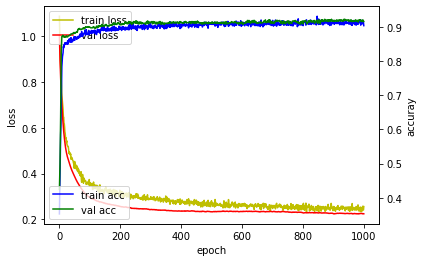

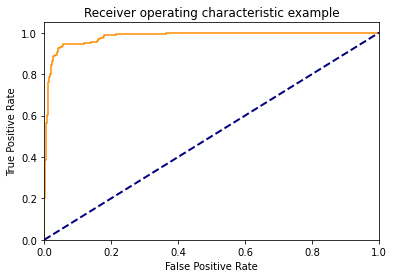


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.03125
 0.03333333 0.03333333 0.0375     0.0375     0.03958333 0.03958333
 0.04166667 0.04166667 0.04583333 0.04583333 0.05416667 0.05416667
 0.05625    0.05625    0.11875    0.11875    0.13958333 0.13958333
 0.15625    0.15625    0.16041667 0.16041667 0.16666667 0.16666667
 0.17291667 0.17708333 0.17708333 0.17916667 0.17916667 0.21458333
 0.21458333 0.29375    0.29791667 0.33125    0.33541667 0.36458333
 0.36458333 0.40208333 0.40625    0.54583333 0.55       0.69166667
 0.69583333 0.7625     0.76666667 1.        ]

tpr : [0.         0.00628931 0.20125786 0.20125786 0.3836478  0.3836478
 0.41509434 0.41509434 0.56603774 0.56603774 0.60377358 0.60377358
 0.647

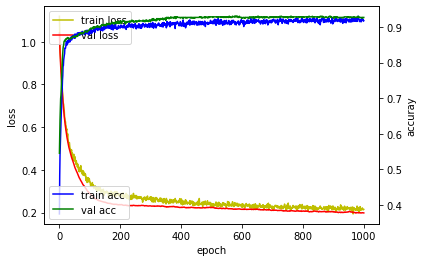

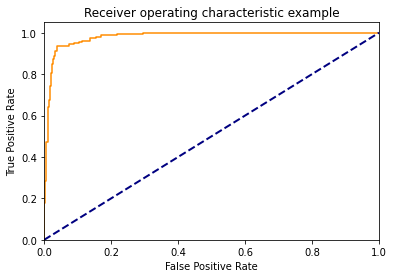


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03333333 0.03333333 0.03958333 0.03958333 0.07291667
 0.07291667 0.08958333 0.08958333 0.10416667 0.10416667 0.1125
 0.1125     0.1375     0.1375     0.15416667 0.15416667 0.16875
 0.16875    0.19375    0.19791667 0.21666667 0.21666667 0.26458333
 0.26875    0.29375    0.29375    0.36875    0.37291667 0.39583333
 0.4        0.63958333 0.64791667 0.66458333 0.66875    0.84375
 0.84791667 0.88541667 0.89166667 0.9        0.90416667 0.91458333
 0.91875    0.98333333 0.9875     1.        ]

tpr : [0.         0.00628931 0.17610063 0.17610063 0.28301887 0.28301887
 0.30188679 0.30188679 0.47169811 0.47169811 0.62264151 0.62264151
 0.64150943 0.64150943 0.67295597 0.67295597 0.74213836 0.74213836
 0.80503145 0.80

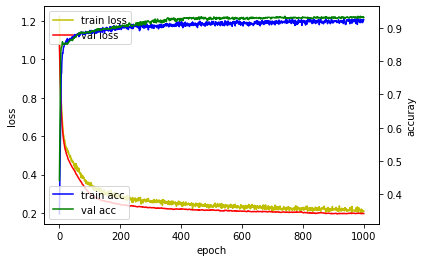

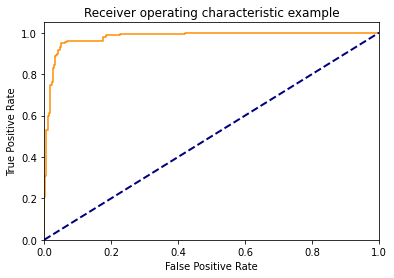


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.04166667
 0.04166667 0.04583333 0.04583333 0.04791667 0.04791667 0.05
 0.05       0.0625     0.0625     0.06875    0.06875    0.175
 0.175      0.17708333 0.17708333 0.18125    0.18541667 0.18541667
 0.22708333 0.22708333 0.23541667 0.23958333 0.30625    0.31041667
 0.31875    0.32291667 0.42083333 0.42083333 0.54375    0.54791667
 0.59791667 0.60208333 0.67291667 0.67708333 0.84375    0.84791667
 0.90833333 0.9125     0.975      0.97916667 1.        ]

tpr : [0.         0.00628931 0.20754717 0.20754717 0.3081761  0.3081761
 0.48427673 0.48427673 0.52830189 0.52830189 0.58490566 0.58490566
 0.5974842

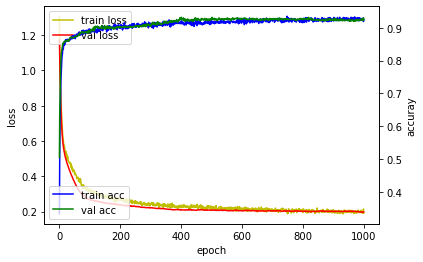

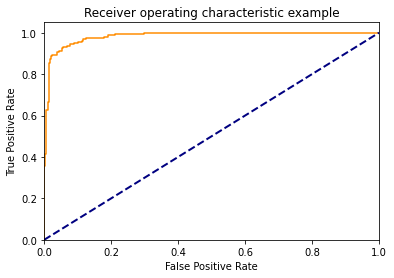


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.0125     0.0125     0.01458333
 0.01458333 0.01666667 0.01666667 0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.03125    0.0375     0.0375     0.04375
 0.04375    0.05208333 0.05208333 0.05625    0.05625    0.06875
 0.06875    0.07708333 0.07708333 0.08958333 0.08958333 0.1
 0.1        0.1125     0.1125     0.11666667 0.11666667 0.125
 0.125      0.17083333 0.175      0.17916667 0.17916667 0.18958333
 0.18958333 0.2125     0.2125     0.29791667 0.29791667 0.38958333
 0.39375    0.41458333 0.41875    0.42708333 0.43125    0.48333333
 0.4875     0.50416667 0.50833333 0.59791667 0.60208333 0.725
 0.72916667 0.95625    0.96041667 0.98541667 0.98958333 1.        ]

tpr : [0.         0.00628931 0.35849057 0.35849057 0.41509434 0.41509434
 0.44025157 0.44025157 0.62893082 0.62893082 0.66666667 0.66666667
 0.85534591 0.85534591 0.87421384 0.87421384 0.88679245 0.88679245
 0.

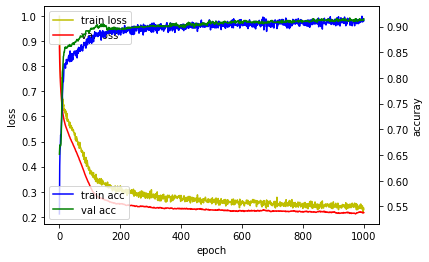

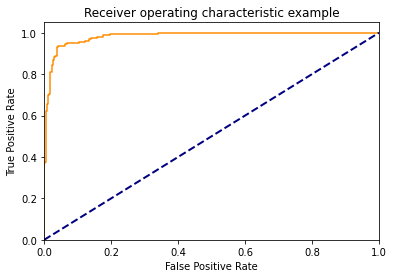


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.0625     0.0625     0.06666667 0.06666667 0.10416667
 0.10416667 0.12291667 0.12291667 0.13333333 0.13333333 0.13958333
 0.13958333 0.15625    0.15625    0.175      0.175      0.18125
 0.18541667 0.19583333 0.19583333 0.29375    0.29791667 0.31666667
 0.32083333 0.33958333 0.33958333 0.35       0.35416667 0.51041667
 0.51458333 0.55625    0.56041667 0.76666667 0.77083333 0.87916667
 0.88333333 0.92916667 0.93333333 0.94166667 0.94583333 1.        ]

tpr : [0.         0.00628931 0.37106918 0.37106918 0.37735849 0.37735849
 0.52830189 0.52830189 0.62264151 0.62264151 0.65408805

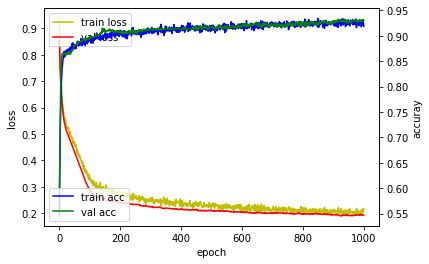

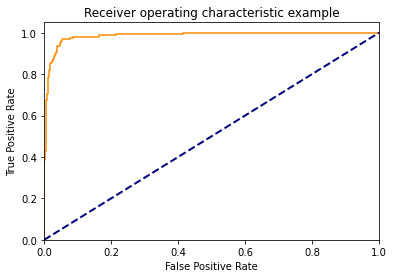


fpr : [0.         0.         0.         0.         0.         0.00208333
 0.00208333 0.00416667 0.00416667 0.00625    0.00625    0.00833333
 0.00833333 0.01041667 0.01041667 0.0125     0.0125     0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.02291667 0.02291667
 0.02708333 0.02708333 0.02916667 0.02916667 0.03125    0.03125
 0.03333333 0.03333333 0.03541667 0.03541667 0.0375     0.0375
 0.03958333 0.03958333 0.04791667 0.04791667 0.05       0.05
 0.05416667 0.05416667 0.07708333 0.07708333 0.0875     0.0875
 0.16458333 0.16458333 0.16875    0.21458333 0.21458333 0.29375
 0.29791667 0.30208333 0.30625    0.34791667 0.35208333 0.41458333
 0.41458333 0.52916667 0.53333333 0.59791667 0.60208333 0.65625
 0.66041667 0.80208333 0.80625    0.84791667 0.85208333 0.88958333
 0.89375    0.9        0.90416667 0.94375    0.94791667 0.98958333
 0.99375    1.        ]

tpr : [0.         0.00628931 0.21383648 0.22641509 0.3836478  0.3836478
 0.42767296 0.42767296 0.60377358 0.60377358 0.6

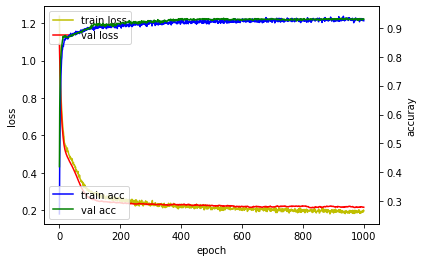

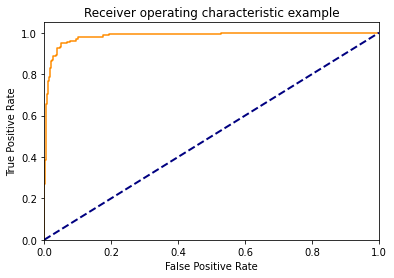


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.03125    0.03541667 0.03541667
 0.0375     0.0375     0.04791667 0.04791667 0.05       0.05
 0.06875    0.06875    0.07708333 0.07708333 0.09375    0.09375
 0.1        0.1        0.17708333 0.17708333 0.18125    0.19375
 0.19375    0.2625     0.26666667 0.32708333 0.33125    0.36875
 0.37291667 0.49583333 0.5        0.52708333 0.52708333 0.53125
 0.60416667 0.60833333 0.92708333 0.93125    1.        ]

tpr : [0.         0.00628931 0.27044025 0.27044025 0.3836478  0.3836478
 0.55345912 0.55345912 0.65408805 0.65408805 0.70440252 0.70440252
 0.71069182 0.71069182 0.7672956  0.7672956  0.78616352 0.78616352
 0.83018868 0.83018868 0.86163522 0.86163522 0.86792453 0.86792453
 0.87421384 0.8

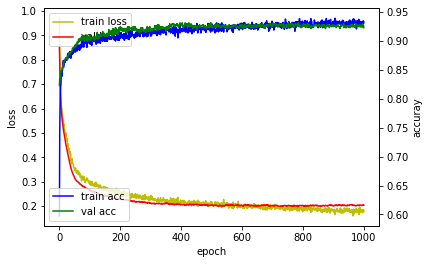

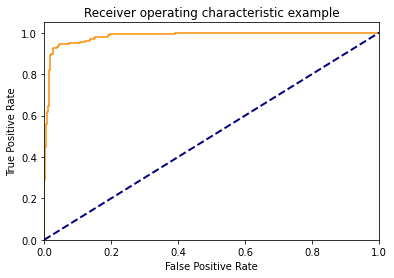


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.025
 0.025      0.02708333 0.02708333 0.03333333 0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.04375    0.04375    0.07291667
 0.07291667 0.10625    0.10625    0.12291667 0.12291667 0.13541667
 0.13541667 0.15       0.15       0.15208333 0.15208333 0.17291667
 0.17708333 0.19166667 0.19166667 0.19583333 0.19583333 0.26458333
 0.26875    0.36458333 0.36875    0.39166667 0.39166667 0.46666667
 0.47083333 0.57291667 0.57708333 0.59375    0.59791667 0.6875
 0.69166667 0.82083333 0.825      0.93541667 0.93958333 0.97708333
 0.98125    1.        ]

tpr : [0.         0.00628931 0.28930818 0.28930818 0.44654088 0.44654088
 0.4591195  0.4591195  0.55974843 0.55974843 0.6163522  0.6163522
 0.64150943 0.64150943 0.64779874 

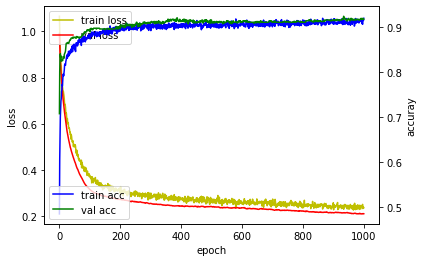

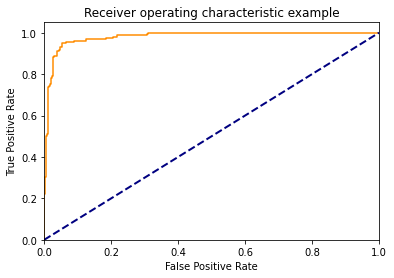


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.0375
 0.0375     0.04375    0.04375    0.04791667 0.04791667 0.05208333
 0.05208333 0.05416667 0.05416667 0.06458333 0.06458333 0.08958333
 0.08958333 0.125      0.125      0.18333333 0.18333333 0.18541667
 0.18958333 0.20416667 0.20416667 0.21666667 0.21666667 0.28541667
 0.28958333 0.30625    0.30625    0.31041667 0.31041667 0.31666667
 0.32083333 0.44791667 0.45208333 0.58125    0.58541667 0.67291667
 0.67708333 0.69583333 0.7        0.83333333 0.8375     1.        ]

tpr : [0.         0.00628931 0.22012579 0.22012579 0.30188679 0.30188679
 0.4591195  0.4591195  0.50314465 0.50314465 0.50943396 0.50943396
 0.54716981 0.54716981 0.73584906 0.73584906 0.74213836 

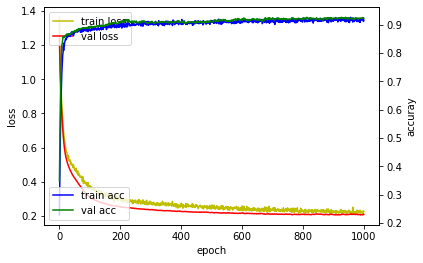

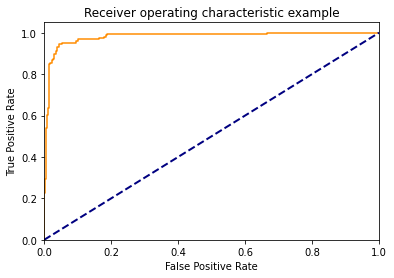


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.02291667 0.02291667 0.025      0.025
 0.02916667 0.02916667 0.03541667 0.03541667 0.03958333 0.03958333
 0.04375    0.04375    0.05208333 0.05208333 0.09583333 0.09583333
 0.10208333 0.10208333 0.1625     0.1625     0.16875    0.17291667
 0.17916667 0.17916667 0.18541667 0.18541667 0.1875     0.1875
 0.24791667 0.25208333 0.31666667 0.32083333 0.39166667 0.39583333
 0.46041667 0.46458333 0.51666667 0.52083333 0.63541667 0.63958333
 0.66666667 0.66666667 1.        ]

tpr : [0.         0.00628931 0.22641509 0.22641509 0.29559748 0.29559748
 0.50314465 0.50314465 0.5408805  0.5408805  0.60377358 0.60377358
 0.62264151 0.62264151 0.63522013 0.63522013 0.8490566  0.8490566
 0.85534591 0.85534591 0.85534591 0.86792453 0.86792453 0.87421384
 0.87421384 0.89937107 

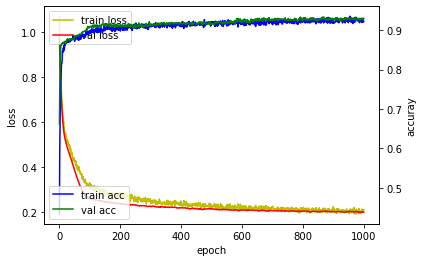

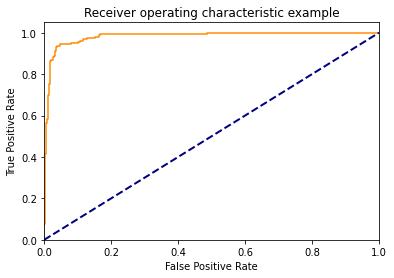


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.025
 0.025      0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.04791667
 0.04791667 0.07916667 0.07916667 0.1        0.1        0.10625
 0.10625    0.11666667 0.11666667 0.12708333 0.12708333 0.15208333
 0.15208333 0.1625     0.1625     0.16666667 0.16666667 0.18125
 0.18541667 0.34166667 0.34583333 0.4        0.40416667 0.41666667
 0.42083333 0.4875     0.4875     0.57083333 0.575      0.63333333
 0.6375     0.68958333 0.69375    0.74375    0.74791667 0.86875
 0.87291667 0.9625     0.96666667 1.        ]

tpr : [0.         0.00628931 0.0754717  0.0754717  0.41509434 0.41509434
 0.50314465 0.50314465 0.56603774 0.56603774 0.58490566 0.58490566
 0.62893082 0.62

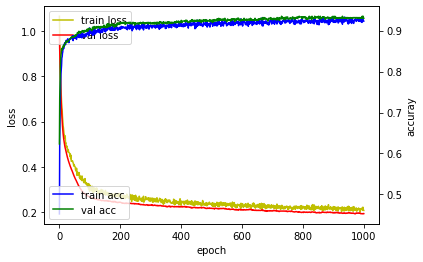

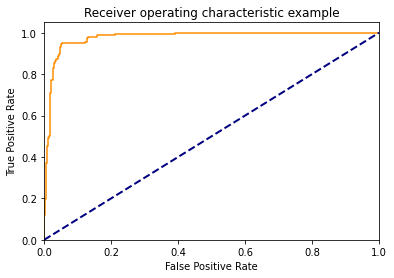


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.02083333 0.02083333 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03333333 0.03333333 0.03541667
 0.03541667 0.04166667 0.04166667 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.12083333 0.12083333 0.12916667 0.12916667 0.13125
 0.13125    0.15625    0.15625    0.1875     0.19166667 0.2125
 0.2125     0.25208333 0.25625    0.32291667 0.32708333 0.3375
 0.34166667 0.39166667 0.39166667 0.59375    0.59791667 0.60625
 0.61041667 0.64583333 0.65       0.89583333 0.9        1.        ]

tpr : [0.         0.01257862 0.11949686 0.11949686 0.19496855 0.19496855
 0.26415094 0.26415094 0.37106918 0.37106918 0.45283019 0.45283019
 0.48427673 0.48427673 0.49056604 0.49056604 0.50314465 0.503

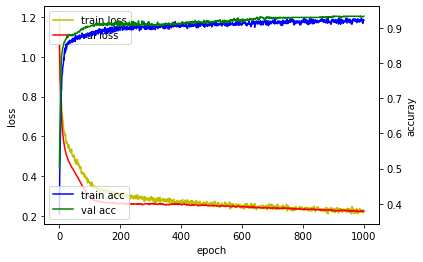

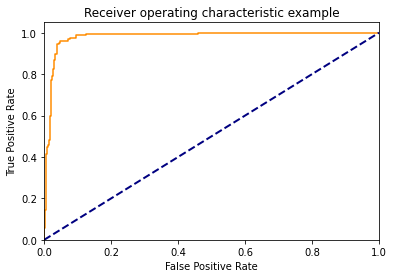


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04375
 0.04375    0.04583333 0.04583333 0.07083333 0.07083333 0.07708333
 0.07708333 0.09375    0.09375    0.09583333 0.09583333 0.125
 0.125      0.19791667 0.20208333 0.275      0.27916667 0.31041667
 0.31458333 0.3375     0.34166667 0.46041667 0.46041667 0.79166667
 0.79583333 0.84583333 0.85208333 0.86666667 0.87083333 0.9625
 0.96666667 1.        ]

tpr : [0.         0.00628931 0.05660377 0.05660377 0.14465409 0.14465409
 0.26415094 0.26415094 0.41509434 0.41509434 0.44654088 0.44654088
 0.4591195  0.4591195  0.48427673 0.48427673 0.59748428 0.59748428
 0.77358491 0.77358491 0.79245283 0.

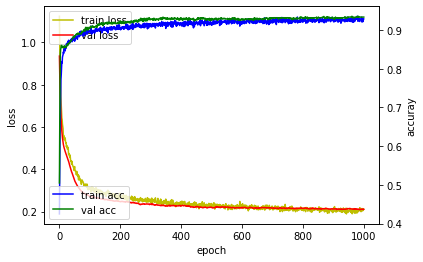

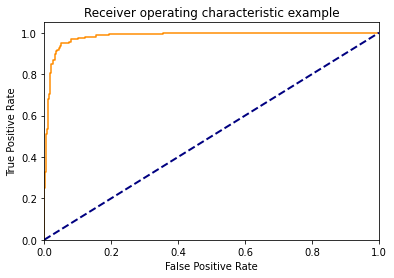


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.025
 0.025      0.02916667 0.03125    0.03125    0.03541667 0.03541667
 0.0375     0.0375     0.04375    0.04375    0.04791667 0.04791667
 0.05       0.05       0.07291667 0.07291667 0.08125    0.08125
 0.1        0.1        0.12291667 0.12291667 0.15416667 0.15416667
 0.18958333 0.19375    0.19375    0.30208333 0.30625    0.32083333
 0.325      0.35625    0.35625    0.36041667 0.36458333 0.50625
 0.51041667 0.58125    0.58541667 0.64791667 0.65208333 0.67083333
 0.675      0.69375    0.69791667 0.85833333 0.8625     0.9375
 0.94166667 0.95208333 0.95625    1.        ]

tpr : [0.         0.00628931 0.25157233 0.25157233 0.32704403 0.32704403
 0.45283019 0.45283019 0.50943396 0.50943396 0.53459119 0.53459119
 0.59748428 0.597

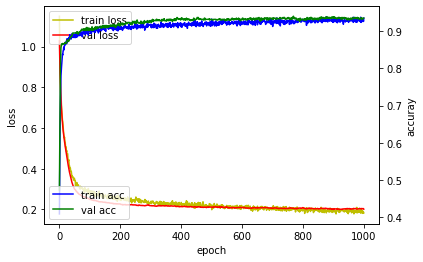

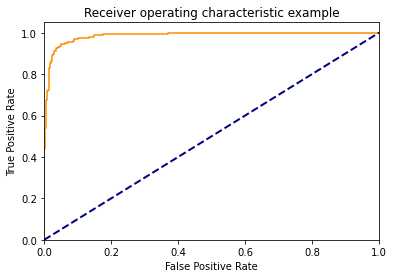


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.02916667 0.02916667 0.03541667 0.03541667 0.0375
 0.04166667 0.04166667 0.04791667 0.04791667 0.05       0.05
 0.0625     0.0625     0.07083333 0.07083333 0.08541667 0.08541667
 0.08958333 0.08958333 0.10208333 0.10208333 0.13333333 0.13333333
 0.15       0.15       0.17083333 0.175      0.17708333 0.17708333
 0.33541667 0.33958333 0.35       0.35416667 0.36041667 0.36458333
 0.36875    0.36875    0.5125     0.51666667 0.5875     0.59166667
 0.62291667 0.62708333 0.88958333 0.89375    0.90416667 0.90833333
 1.        ]

tpr : [0.         0.00628931 0.44025157 0.44025157 0.5408805  0.5408805
 0.59119497 0.59119497 0.67295597 0.67295597 0.71698113 0.71698113
 0.72327044 0.72327044 0.83018868 0.83018868 0.836477

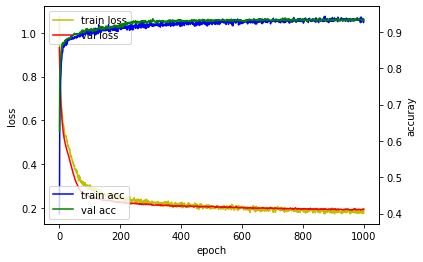

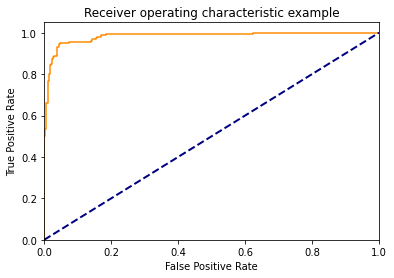


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03333333 0.0375     0.0375     0.03958333 0.03958333
 0.04375    0.04375    0.04791667 0.04791667 0.075      0.075
 0.13958333 0.13958333 0.14375    0.14375    0.15416667 0.15416667
 0.15833333 0.15833333 0.16875    0.16875    0.17291667 0.18541667
 0.18541667 0.27291667 0.27708333 0.35208333 0.35625    0.45833333
 0.4625     0.51875    0.52291667 0.59375    0.59791667 0.62291667
 0.62291667 0.72916667 0.73333333 0.89166667 0.89583333 1.        ]

tpr : [0.         0.00628931 0.50314465 0.50314465 0.53459119 0.53459119
 0.61006289 0.61006289 0.66037736 0.66037736 0.67924528 0.67924528
 0.7672956  0.7672956  0.79874214 0.79874214 0.8427673  0.8427673
 0.8490566  0.8490566  0.87421384 0.87421384 0.88050314 0

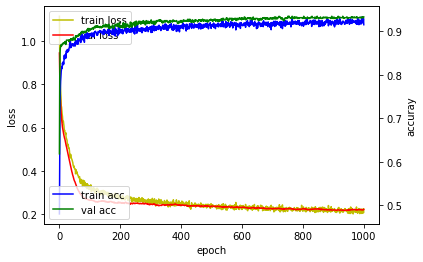

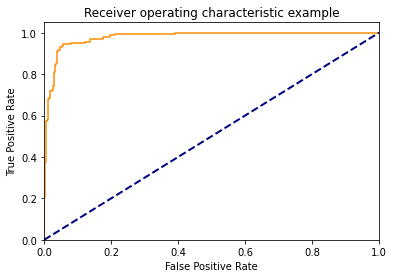


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.01875    0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.03958333 0.03958333 0.04166667 0.04166667 0.04583333
 0.04583333 0.05208333 0.05208333 0.05625    0.05625    0.08125
 0.08125    0.12083333 0.12083333 0.1375     0.1375     0.17291667
 0.17708333 0.17708333 0.19583333 0.19583333 0.21041667 0.21041667
 0.28958333 0.29791667 0.3875     0.39166667 0.39166667 0.40625
 0.4125     0.59583333 0.6        0.65       0.65416667 0.8
 0.80416667 0.85       0.85416667 0.875      0.87916667 0.88958333
 0.89375    0.90625    0.9125     0.93125    0.93541667 0.97083333
 0.97916667 0.98541667 0.98958333 0.99375    1.        ]

tpr : [0.         0.00628931 0.20754717 0.20754717 0.37735849 0.37735849
 0.57232704

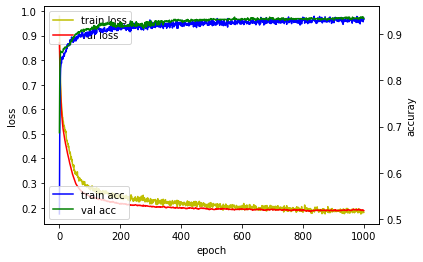

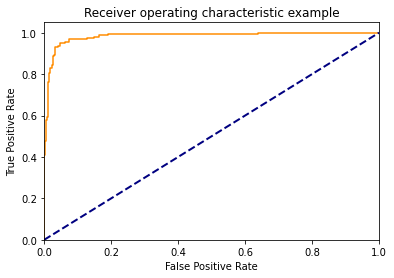


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.04166667 0.04166667 0.04583333 0.04583333 0.04791667
 0.04791667 0.0625     0.0625     0.07291667 0.07291667 0.12916667
 0.12916667 0.15       0.15       0.16458333 0.16458333 0.18958333
 0.18958333 0.19375    0.19791667 0.29375    0.29791667 0.31458333
 0.31875    0.47083333 0.475      0.4875     0.49166667 0.60625
 0.61041667 0.63958333 0.63958333 0.6875     0.69166667 0.8875
 0.89166667 0.92083333 0.925      0.96041667 0.96458333 0.98125
 0.98541667 1.        ]

tpr : [0.         0.00628931 0.40880503 0.40880503 0.47798742 0.47798742
 0.53459119 0.53459119 0.57861635 0.57861635 0.59119497 0.59119497
 0.63522013 0.63522013 0.76100629 0.761006

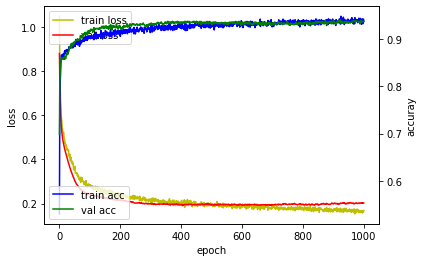

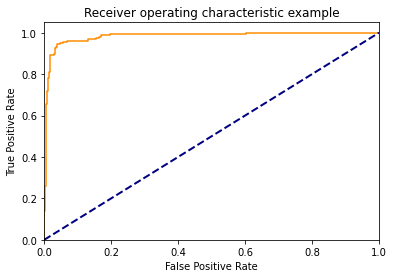


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02291667 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.03958333 0.03958333 0.04791667 0.04791667 0.05625
 0.05625    0.06666667 0.06666667 0.13125    0.13125    0.15416667
 0.15416667 0.16458333 0.16458333 0.17083333 0.17083333 0.17291667
 0.17708333 0.19583333 0.19583333 0.27083333 0.275      0.32916667
 0.33333333 0.33541667 0.33958333 0.55208333 0.55625    0.60416667
 0.60416667 0.61666667 0.62083333 0.65625    0.66041667 0.66666667
 0.67083333 0.79583333 0.8        0.85416667 0.85833333 0.92708333
 0.93125    0.93333333 0.9375     0.93958333 0.94375    0.94583333
 0.95       0.96875    0.97291667 0.97708333 0.98125    1.        ]

tpr : [0.         0.00628931 0.13836478 0.13836478 0.257

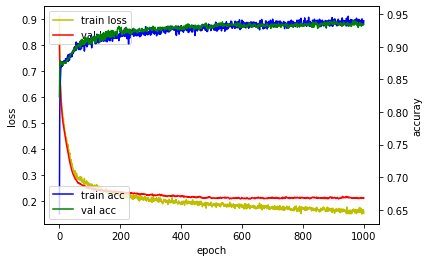

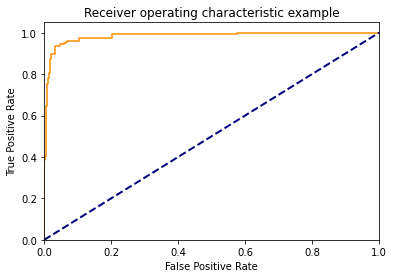


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02708333
 0.03125    0.03125    0.03333333 0.03333333 0.04791667 0.04791667
 0.06041667 0.06041667 0.06458333 0.06458333 0.06666667 0.06666667
 0.10416667 0.10416667 0.17916667 0.18333333 0.20208333 0.20208333
 0.26041667 0.26458333 0.30833333 0.3125     0.46875    0.47291667
 0.50208333 0.50625    0.54375    0.54791667 0.575      0.575
 0.59375    0.59791667 0.67708333 0.68125    0.79583333 0.8
 0.80833333 0.8125     0.84583333 0.85       0.88333333 0.8875
 0.89166667 0.89583333 0.90416667 0.90833333 0.92708333 0.93333333
 0.95       0.95416667 0.97083333 0.975      0.99375    0.99791667
 1.        ]

tpr : [0.         0.00628931 0.3836478  0.3836478  0.40251572 0.40251572
 0.54716981 0.54716981 0.64779874 0.64779874 0.7547

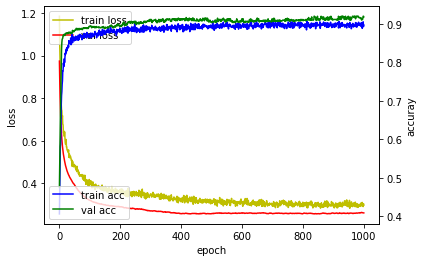

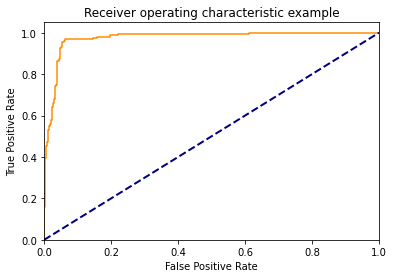


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.03541667 0.03541667 0.0375
 0.0375     0.03958333 0.03958333 0.04375    0.04375    0.04583333
 0.04583333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.06041667 0.06041667 0.0625     0.0625     0.14583333
 0.14583333 0.15833333 0.15833333 0.18333333 0.1875     0.19791667
 0.19791667 0.22083333 0.22083333 0.23333333 0.2375     0.29166667
 0.29583333 0.30833333 0.3125     0.40208333 0.40625    0.6125
 0.6125     0.625      0.62916667 0.64375    0.64791667 0.94583333
 0.95       1.        ]

tpr : [0.         0.00628931 0.1572327  0.1572327  0.39622642 0.39622642
 0.41509434 0.41509434 0.45283019 0.4528301

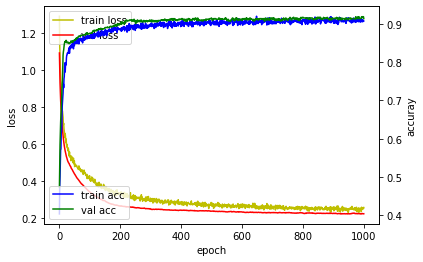

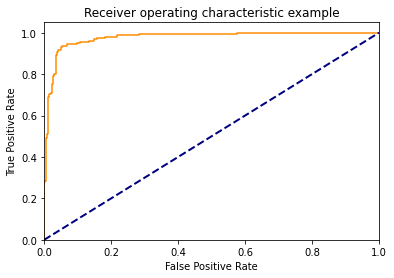


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02916667
 0.02916667 0.03333333 0.03541667 0.03541667 0.03958333 0.03958333
 0.04166667 0.04166667 0.05       0.05       0.05416667 0.05416667
 0.06875    0.06875    0.09791667 0.09791667 0.10833333 0.10833333
 0.13333333 0.13333333 0.14791667 0.14791667 0.15625    0.15625
 0.17708333 0.18125    0.18125    0.21875    0.21875    0.28333333
 0.28333333 0.29375    0.29791667 0.31458333 0.31875    0.32708333
 0.33125    0.52083333 0.525      0.575      0.575      0.61666667
 0.62083333 0.67916667 0.68333333 1.        ]

tpr : [0.         0.00628931 0.27672956 0.27672956 0.28301887 0.28301887
 0.47798742 0.47798742 0.49056604 0.49056604 0.50943396 0.50943396
 0.68553459 0.68553459 0.6918239  0.6918239  0.70440252 0.70440252
 0.71

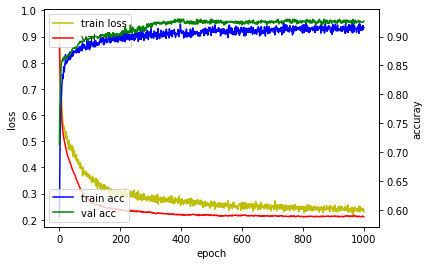

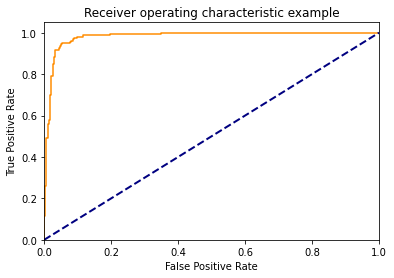


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.04375    0.04375    0.04791667 0.04791667 0.05
 0.05       0.05208333 0.05208333 0.07708333 0.07708333 0.08125
 0.08125    0.08541667 0.08541667 0.08958333 0.08958333 0.09791667
 0.09791667 0.11666667 0.11666667 0.19583333 0.19583333 0.2
 0.25       0.25416667 0.30833333 0.3125     0.35       0.35
 0.38333333 0.3875     0.53958333 0.54375    0.65833333 0.6625
 0.67916667 0.68333333 1.        ]

tpr : [0.         0.00628931 0.11320755 0.11320755 0.25786164 0.25786164
 0.33333333 0.33333333 0.49056604 0.49056604 0.49685535 0.49685535
 0.55974843 0.55974843 0.57861635 0.57861635 0.59119497 0.59119497
 0.69811321 0.69811321 0.79245283 0.79245283 0

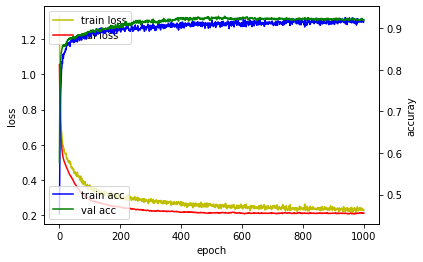

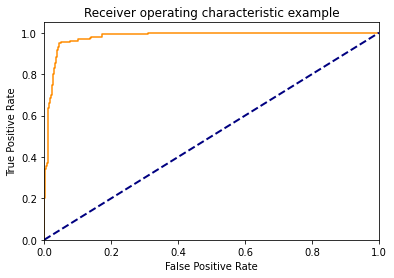


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.0125     0.0125     0.01458333
 0.01458333 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02708333 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.0375     0.0375     0.03958333 0.03958333 0.04166667
 0.04166667 0.04375    0.04375    0.05       0.05       0.07708333
 0.07708333 0.10208333 0.10208333 0.13541667 0.13541667 0.13958333
 0.13958333 0.17291667 0.17291667 0.18333333 0.1875     0.28333333
 0.2875     0.31041667 0.31041667 0.40625    0.41041667 0.45833333
 0.4625     0.59791667 0.60208333 0.6125     0.61666667 0.70625
 0.71041667 0.73125    0.73541667 1.        ]

tpr : [0.         0.00628931 0.20125786 0.20125786 0.33962264 0.33962264
 0.35849057 0.35849057 0.37106918 0.37106918 0.63522013 0.63522013
 0.66037736 0.66037736 0.68553459 0.68553459 0.69811321 0.69811321
 0.74

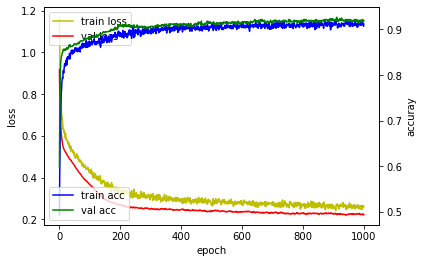

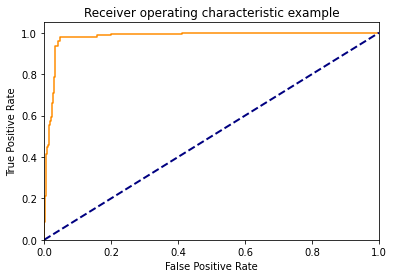


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00208333
 0.00208333 0.00416667 0.00416667 0.00625    0.00625    0.00833333
 0.00833333 0.01041667 0.01041667 0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03125    0.03333333 0.03333333 0.04166667 0.04166667
 0.04583333 0.04583333 0.04791667 0.04791667 0.15625    0.15625
 0.19166667 0.19583333 0.2        0.2        0.25416667 0.25833333
 0.39166667 0.39583333 0.4125     0.4125     0.51875    0.52291667
 0.8625     0.86666667 0.87916667 0.88333333 0.92916667 0.93333333
 1.        ]

tpr : [0.         0.00628931 0.08805031 0.08805031 0.10691824 0.11949686
 0.21383648 0.21383648 0.3081761  0.3081761  0.41509434 0.41509434
 0.44654088 0.44654088 0.4591195  0.4591195  0.55345912 0.55345912
 0.55974843 0.55974843 0.57232704 0.57232704 0.59119497 0.59119497
 0.66037736 0.66037736 0.71069182 0.71069

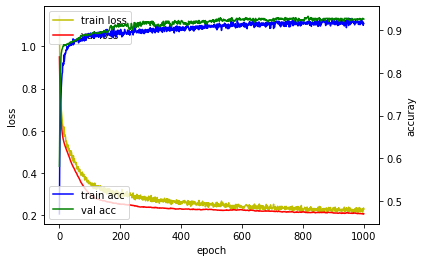

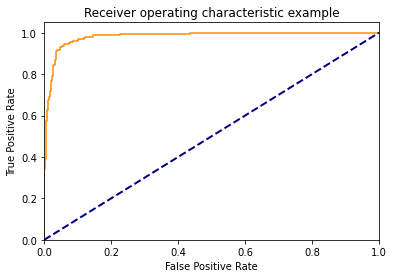


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00833333 0.00833333 0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.01666667 0.01666667 0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.03125    0.03125    0.03541667 0.03541667 0.0375
 0.0375     0.04583333 0.04583333 0.05416667 0.05416667 0.06041667
 0.06041667 0.075      0.075      0.07708333 0.07708333 0.0875
 0.0875     0.1        0.1        0.11875    0.11875    0.12291667
 0.12291667 0.14583333 0.14583333 0.1875     0.19166667 0.225
 0.225      0.29166667 0.29583333 0.31458333 0.31875    0.35416667
 0.35833333 0.43541667 0.43541667 0.5625     0.56666667 0.57083333
 0.575      0.64166667 0.64583333 0.65208333 0.65625    0.70416667
 0.70833333 1.        ]

tpr : [0.         0.00628931 0.33962264 0.33962264 0.38993711 0.38993711
 0.57232704 0.57232704 0.62893082 0.62893082 0.63522013 0.63522013
 0.67295597 0.67295597 0.6918239  0.69182

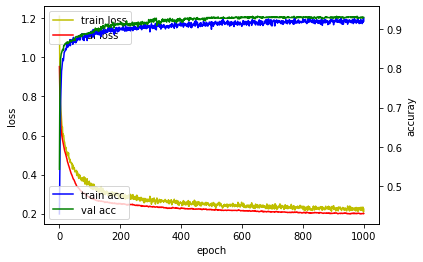

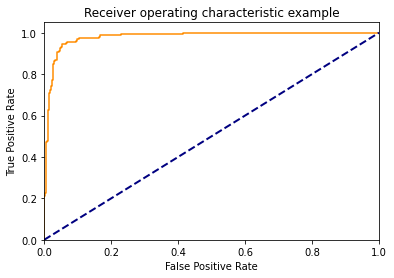


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02708333 0.02708333 0.02916667 0.02916667 0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04375
 0.04375    0.04583333 0.04583333 0.04791667 0.04791667 0.05
 0.05       0.05208333 0.05208333 0.06458333 0.06458333 0.06875
 0.06875    0.09375    0.09375    0.09791667 0.09791667 0.10416667
 0.10416667 0.16458333 0.16458333 0.16666667 0.16666667 0.18958333
 0.19375    0.22916667 0.22916667 0.27708333 0.28125    0.36041667
 0.36458333 0.375      0.37916667 0.41458333 0.41458333 0.61875
 0.62291667 0.6625     0.66666667 0.70208333 0.70625    1.        ]

tpr : [0.         0.00628931 0.21383648 0.21383648 0.22641509 0.22641509
 0.4591195  0.4591195  0.47169811 0.47169811 0.47798742 0.4779

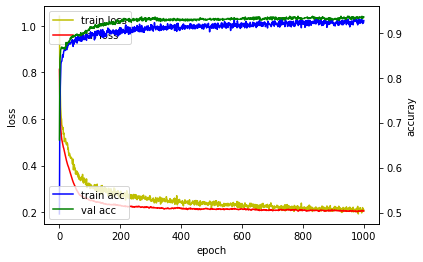

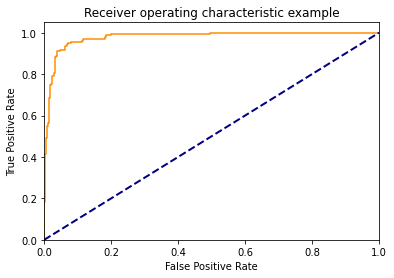


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00625
 0.00625    0.00833333 0.00833333 0.0125     0.0125     0.01458333
 0.01458333 0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.02916667 0.02916667
 0.03125    0.03125    0.03333333 0.03333333 0.03541667 0.03541667
 0.03958333 0.03958333 0.04583333 0.04583333 0.0625     0.0625
 0.06666667 0.06666667 0.07083333 0.07083333 0.08125    0.08125
 0.1125     0.1125     0.11666667 0.11666667 0.18125    0.18125
 0.18333333 0.18333333 0.1875     0.2        0.2        0.24791667
 0.25208333 0.31458333 0.31875    0.34166667 0.34583333 0.49375
 0.49375    0.58125    0.58541667 0.63958333 0.64375    0.6625
 0.66666667 0.8        0.80416667 1.        ]

tpr : [0.         0.00628931 0.18238994 0.18238994 0.41509434 0.41509434
 0.49056604 0.49056604 0.54716981 0.54716981 0.56603774 0.56603774
 0.68553459 0.68553459 0.71069182 0.71069182 0.74842767 0.74842767
 0.75471698 0.75471698

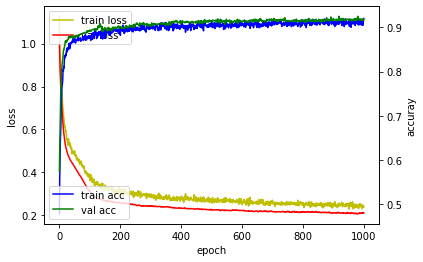

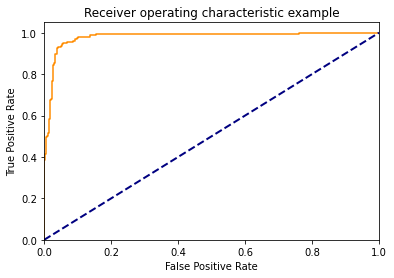


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03333333 0.03333333 0.0375     0.0375     0.03958333
 0.03958333 0.04166667 0.04166667 0.05       0.05       0.05416667
 0.05416667 0.05625    0.05625    0.06666667 0.06666667 0.08541667
 0.08541667 0.09166667 0.09166667 0.09791667 0.09791667 0.10208333
 0.10208333 0.13541667 0.13541667 0.15416667 0.15416667 0.16875
 0.17291667 0.27708333 0.28125    0.33333333 0.3375     0.38125
 0.38541667 0.7625     0.7625     0.82708333 0.83125    0.83333333
 0.8375     0.86041667 0.86458333 1.        ]

tpr : [0.         0.00628931 0.3836478  0.3836478  0.41509434 0.41509434
 0.49056604 0.49056604 0.49685535 0.49685535 0.50314465 0.50314465
 0.51572327 0.51572

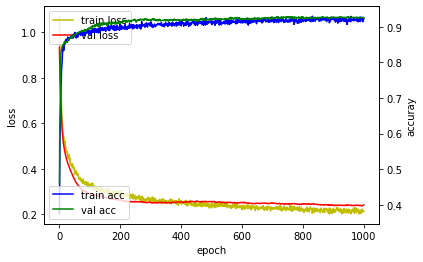

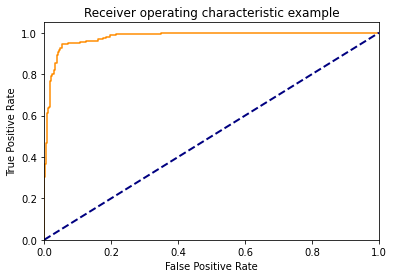


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02916667 0.02916667 0.03125    0.03125    0.03333333 0.03333333
 0.0375     0.0375     0.03958333 0.03958333 0.04166667 0.04166667
 0.04375    0.04375    0.04583333 0.04583333 0.05208333 0.05208333
 0.05416667 0.05416667 0.07083333 0.07083333 0.10833333 0.10833333
 0.125      0.125      0.16041667 0.16041667 0.17708333 0.17708333
 0.17916667 0.18333333 0.18333333 0.19583333 0.19583333 0.21458333
 0.21458333 0.29791667 0.30208333 0.31458333 0.31875    0.35
 0.35       0.37083333 0.375      0.58333333 0.5875     0.60625
 0.61041667 0.61458333 0.61875    0.86458333 0.86875    0.95416667
 0.95833333 0.97083333 0.975      1.        ]

tpr : [0.         0.00628931 0.30188679 0.30188679 0.36477987 0.36477987
 0.42138365 0.

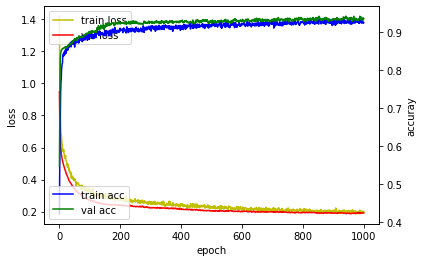

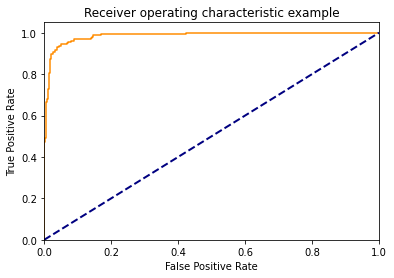


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.025      0.025      0.03333333
 0.03333333 0.0375     0.0375     0.03958333 0.03958333 0.04375
 0.04375    0.05       0.05       0.06875    0.06875    0.07083333
 0.07083333 0.07916667 0.07916667 0.08958333 0.08958333 0.13958333
 0.13958333 0.14375    0.14375    0.14583333 0.14583333 0.16875
 0.16875    0.17916667 0.18333333 0.26666667 0.27083333 0.34166667
 0.34583333 0.40416667 0.40833333 0.42291667 0.42291667 0.60416667
 0.60833333 0.6375     0.64166667 0.64791667 0.65208333 0.84583333
 0.85       0.92708333 0.93125    0.98333333 0.9875     1.        ]

tpr : [0.         0.00628931 0.47169811 0.47169811 0.49056604 0.49056604
 0.51572327 0.51572327 0.66666667 0.66666667 0.67924528 0.67924528
 0.72955975 0.72955975 0.80503145 0.80503145 0.81132075 

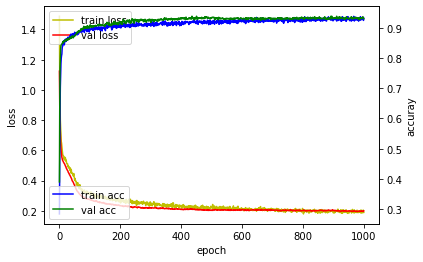

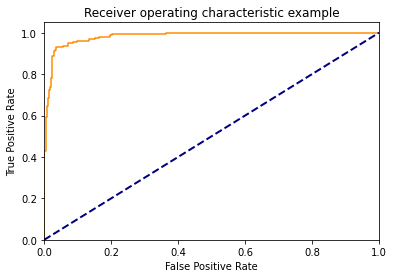


fpr : [0.         0.         0.         0.00416667 0.00416667 0.00625
 0.00625    0.00833333 0.00833333 0.01041667 0.01041667 0.01458333
 0.01458333 0.01875    0.01875    0.02083333 0.02083333 0.02291667
 0.02291667 0.02916667 0.02916667 0.03333333 0.03333333 0.03541667
 0.03541667 0.05625    0.05625    0.07083333 0.07083333 0.08541667
 0.08541667 0.09791667 0.09791667 0.13333333 0.13333333 0.15208333
 0.15208333 0.1625     0.1625     0.175      0.17916667 0.19583333
 0.19583333 0.20208333 0.20208333 0.25208333 0.25625    0.36458333
 0.36458333 0.3875     0.39166667 0.42291667 0.42708333 0.53958333
 0.54375    0.64375    0.64791667 0.65625    0.66041667 1.        ]

tpr : [0.         0.00628931 0.42767296 0.42767296 0.57232704 0.57232704
 0.59119497 0.59119497 0.64779874 0.64779874 0.68553459 0.68553459
 0.72327044 0.72327044 0.73584906 0.73584906 0.77987421 0.77987421
 0.88679245 0.88679245 0.91194969 0.91194969 0.91823899 0.91823899
 0.93081761 0.93081761 0.93710692 0.93710692 0.949

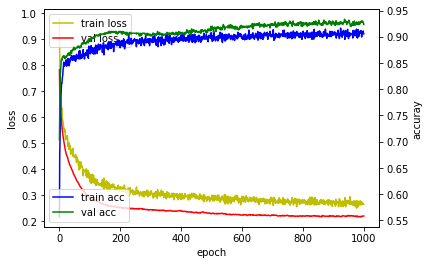

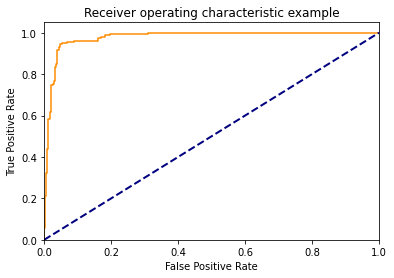


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02708333 0.02708333 0.02916667
 0.02916667 0.03125    0.03125    0.03333333 0.03333333 0.03541667
 0.03541667 0.0375     0.0375     0.03958333 0.03958333 0.04375
 0.04375    0.04583333 0.04583333 0.05416667 0.05416667 0.06666667
 0.06666667 0.08958333 0.08958333 0.16041667 0.16041667 0.17083333
 0.17083333 0.18125    0.18125    0.1875     0.19166667 0.19583333
 0.19583333 0.25416667 0.25833333 0.31041667 0.31041667 0.33958333
 0.34375    0.37916667 0.38333333 0.56666667 0.57083333 0.67083333
 0.675      0.67916667 0.68333333 0.76875    0.77291667 1.        ]

tpr : [0.         0.00628931 0.05660377 0.05660377 0.21383648 0.21383648
 0.25786164 0.25786164 0.32075472 0.32075472 0.44025157 0.44025157
 0.52201258 0.52201258 0.58490566 0.58490566 0.597484

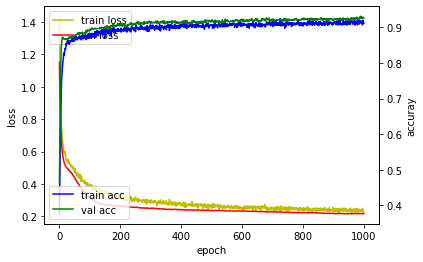

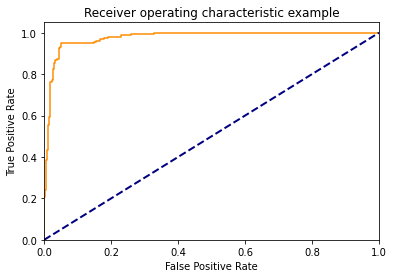


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.01875    0.01875    0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03125
 0.03125    0.03541667 0.0375     0.0375     0.04375    0.04375
 0.04791667 0.04791667 0.05       0.05       0.15       0.15
 0.15416667 0.15416667 0.16666667 0.16666667 0.17916667 0.17916667
 0.18125    0.18541667 0.18958333 0.18958333 0.22916667 0.22916667
 0.24583333 0.25       0.26041667 0.26041667 0.30625    0.31041667
 0.3125     0.31666667 0.32708333 0.32708333 0.58125    0.58541667
 0.63541667 0.63958333 0.67708333 0.68125    0.85208333 0.85625
 1.        ]

tpr : [0.         0.00628931 0.20754717 0.20754717 0.23899371 0.23899371
 0.30188679 0.30188679 0.3836478  0.3836478  0.43396226 0.43396226
 0.50943396 0.50943396 0.55345912 0.55345912 0.59119497

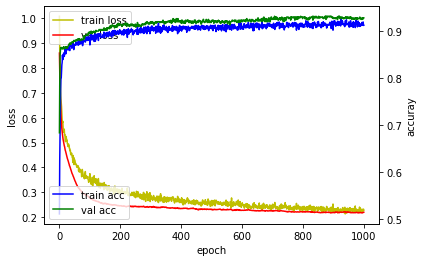

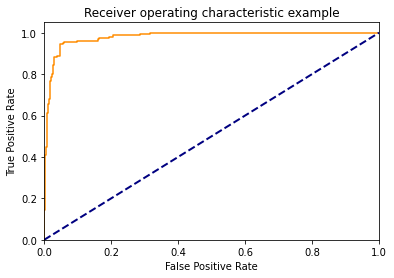


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01666667
 0.01666667 0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03958333
 0.03958333 0.04583333 0.04583333 0.04791667 0.04791667 0.05625
 0.05625    0.06041667 0.06041667 0.09791667 0.09791667 0.16041667
 0.16041667 0.1625     0.1625     0.18125    0.18541667 0.19375
 0.19375    0.20416667 0.20416667 0.27916667 0.28333333 0.2875
 0.2875     0.29583333 0.3        0.31458333 0.31458333 0.325
 0.32916667 0.5        0.50416667 0.57083333 0.575      0.63541667
 0.63958333 0.67916667 0.68333333 0.88541667 0.88958333 1.        ]

tpr : [0.         0.00628931 0.14465409 0.14465409 0.40880503 0.40880503
 0.41509434 0.41509434 0.44654088 0.44654088 0.61006289 0.61006289
 0.62264151 0.62264151 0.65408805 0.65408805 0.67924528 0.67924528


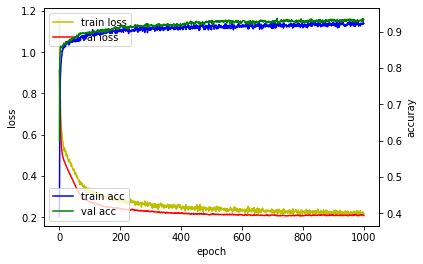

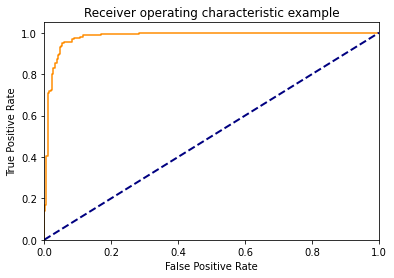


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.01041667 0.01041667 0.0125
 0.0125     0.01458333 0.01458333 0.02083333 0.02083333 0.02291667
 0.02291667 0.025      0.025      0.02916667 0.03333333 0.03333333
 0.0375     0.0375     0.03958333 0.03958333 0.04166667 0.04166667
 0.04375    0.04375    0.04583333 0.04583333 0.04791667 0.04791667
 0.05       0.05       0.05208333 0.05208333 0.05416667 0.05416667
 0.05833333 0.05833333 0.08333333 0.08333333 0.08958333 0.08958333
 0.10625    0.10625    0.11458333 0.11458333 0.16875    0.16875
 0.2        0.20416667 0.26875    0.27291667 0.28333333 0.28333333
 0.34791667 0.35208333 0.3625     0.36666667 0.53333333 0.5375
 0.63541667 0.63958333 0.69583333 0.7        0.93541667 0.93958333
 1.        ]

tpr : [0.         0.00628931 0.13836478 0.13836478 0.16981132 0.16981132
 0.24528302 0.24528302 0.40251572 0.40251572 0.61006289 0.61006289
 0.71069182 0.71069182 0.71698113 0.71698113 0

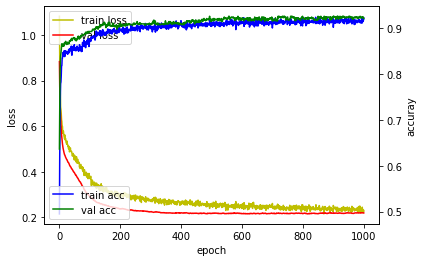

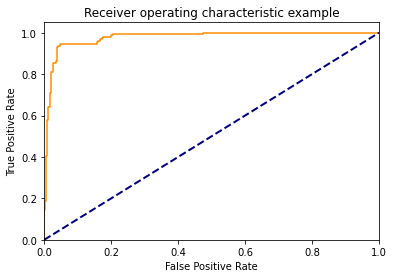


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.0125
 0.0125     0.01666667 0.01666667 0.01875    0.01875    0.02083333
 0.02083333 0.025      0.025      0.02708333 0.02708333 0.03541667
 0.03541667 0.0375     0.0375     0.04166667 0.04166667 0.04583333
 0.04583333 0.15833333 0.15833333 0.16041667 0.16041667 0.16666667
 0.16666667 0.16875    0.17291667 0.17291667 0.17708333 0.17708333
 0.2        0.2        0.20625    0.20625    0.2875     0.29166667
 0.30416667 0.30833333 0.325      0.32916667 0.47291667 0.47291667
 0.50208333 0.50625    0.53958333 0.54375    0.575      0.57916667
 0.6375     0.64166667 1.        ]

tpr : [0.         0.00628931 0.14465409 0.14465409 0.18867925 0.18867925
 0.25786164 0.25786164 0.40251572 0.40251572 0.57861635 0.57861635
 0.64150943 0.64150943 0.67924528 0.67924528 0.71069182 0.71069182
 0.81132075 0.81132075 0.83018868 0.83018868 0.85534591 0.85534591
 0.86163522 0.861

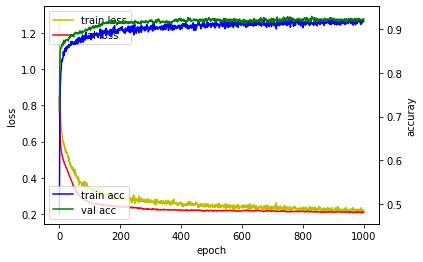

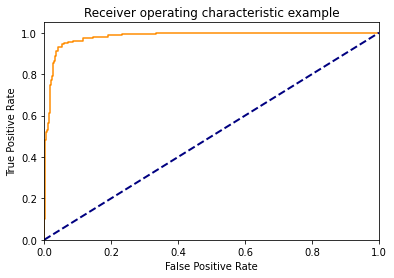


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.04166667 0.04166667 0.05416667
 0.05416667 0.05833333 0.05833333 0.07083333 0.07083333 0.08541667
 0.08541667 0.11458333 0.11458333 0.14583333 0.14583333 0.17708333
 0.18125    0.18958333 0.18958333 0.23333333 0.23333333 0.25416667
 0.25833333 0.31666667 0.32083333 0.33541667 0.33541667 0.41458333
 0.41875    0.575      0.57916667 0.6625     0.66666667 0.73333333
 0.7375     1.        ]

tpr : [0.         0.00628931 0.10062893 0.10062893 0.48427673 0.48427673
 0.49685535 0.49685535 0.52201258 0.52201258 0.52830189 0.52830189
 0.56603774 0.56603774 0.61006289 0.61006289 0.68553459 0.68553459
 0.74842767 0.74842767 0.77

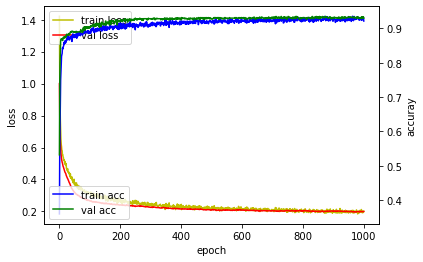

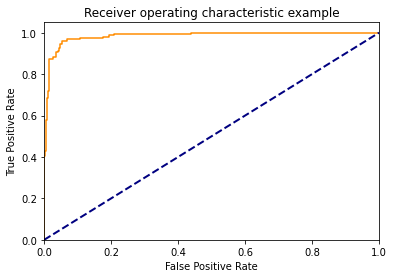


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.025
 0.025      0.02916667 0.03541667 0.03541667 0.04166667 0.04166667
 0.04375    0.04375    0.04583333 0.04583333 0.04791667 0.04791667
 0.05208333 0.05208333 0.05416667 0.05416667 0.06666667 0.06666667
 0.10833333 0.10833333 0.17708333 0.17708333 0.1875     0.19166667
 0.19375    0.19375    0.20833333 0.20833333 0.28541667 0.28958333
 0.33333333 0.3375     0.43958333 0.43958333 0.475      0.47916667
 0.53333333 0.5375     0.58958333 0.59375    0.7125     0.71666667
 0.9125     0.91666667 0.96041667 0.96458333 1.        ]

tpr : [0.         0.00628931 0.40251572 0.40251572 0.42767296 0.42767296
 0.54716981 0.54716981 0.57861635 0.57861635 0.68553459 0.68553459
 0.71069182 0.71069182 0.71698113 0.71698113 0.87421384 0.87421384
 0.88050314 0.88050314 0.88050314 0.90566038 0.90566038 0.91194

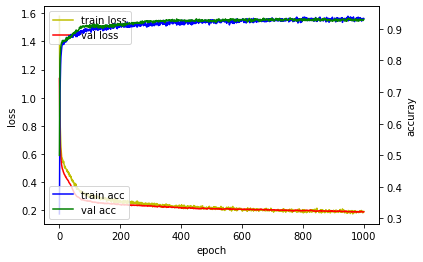

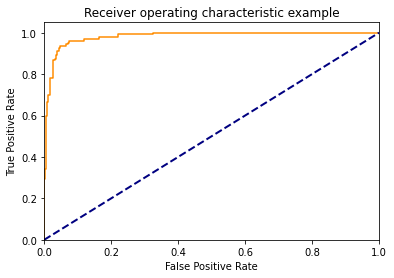


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01666667 0.01666667 0.01875    0.01875    0.02291667
 0.025      0.025      0.02708333 0.02708333 0.03125    0.03125
 0.03541667 0.03541667 0.03958333 0.03958333 0.04375    0.04375
 0.04583333 0.04583333 0.04791667 0.04791667 0.06458333 0.06458333
 0.07083333 0.07083333 0.07291667 0.07291667 0.075      0.075
 0.11875    0.11875    0.1625     0.1625     0.16458333 0.16458333
 0.18541667 0.18958333 0.22083333 0.22083333 0.29583333 0.3
 0.30625    0.31041667 0.325      0.325      0.41458333 0.41875
 0.5875     0.59166667 0.61041667 0.61458333 0.70625    0.71041667
 0.85       0.85416667 0.91041667 0.91458333 1.        ]

tpr : [0.         0.00628931 0.29559748 0.29559748 0.33962264 0.33962264
 0.47798742 0.47798742 0.59748428 0.59748428 0.66666667 0.66666667
 0.69811321 0.69811321 0.75471698 0.75471698 0.77987421 0.77987421
 0.77987421 

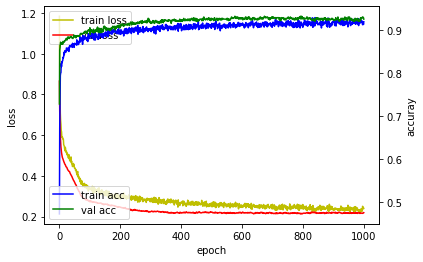

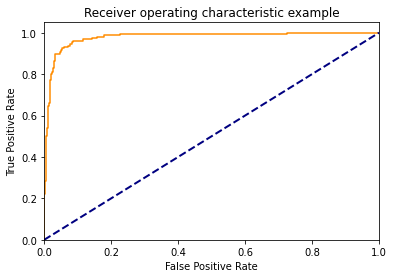


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01458333 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.025
 0.025      0.02708333 0.02708333 0.02916667 0.02916667 0.03333333
 0.03333333 0.04791667 0.04791667 0.05       0.05       0.05208333
 0.05208333 0.06041667 0.06041667 0.07083333 0.07083333 0.07708333
 0.07708333 0.08333333 0.08333333 0.08541667 0.08541667 0.11666667
 0.11666667 0.14375    0.14375    0.15833333 0.15833333 0.17916667
 0.17916667 0.22291667 0.22708333 0.22708333 0.60833333 0.6125
 0.6375     0.64166667 0.64791667 0.65208333 0.725      0.725
 0.8875     0.89166667 0.89791667 0.90208333 0.95625    0.96041667
 1.        ]

tpr : [0.         0.01257862 0.22012579 0.22012579 0.28301887 0.28301887
 0.37106918 0.37106918 0.50314465 0.50314465 0.5408805  0.5408805
 0.60377358 0.60377358 0.64779874 0.64779874 0.660377

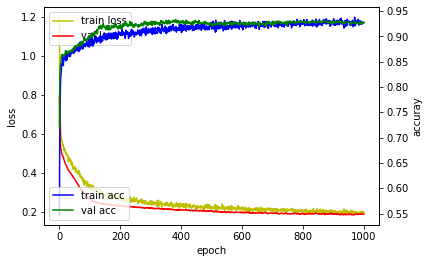

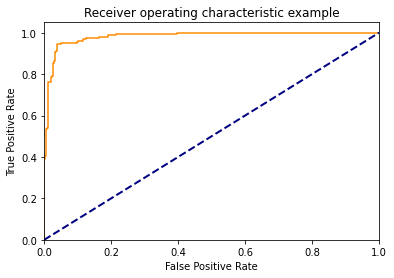


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.0125     0.0125     0.01458333 0.01875    0.02083333
 0.02083333 0.02291667 0.02291667 0.025      0.025      0.02708333
 0.02708333 0.02916667 0.02916667 0.03125    0.03125    0.03333333
 0.03333333 0.03541667 0.03541667 0.0375     0.0375     0.03958333
 0.03958333 0.05       0.05       0.09791667 0.09791667 0.1
 0.1        0.11458333 0.11458333 0.125      0.125      0.16458333
 0.16458333 0.19166667 0.19166667 0.19583333 0.2        0.21458333
 0.21458333 0.27916667 0.28333333 0.39166667 0.39583333 0.39583333
 0.40416667 0.59791667 0.60208333 0.60416667 0.60833333 0.61875
 0.62291667 0.86041667 0.86458333 0.925      0.92916667 1.        ]

tpr : [0.         0.00628931 0.38993711 0.38993711 0.40251572 0.40251572
 0.40880503 0.40880503 0.53459119 0.53459119 0.5408805  0.5408805
 0.64150943 0.64150943 0.76100629 0.76100629 0.76100629 0.

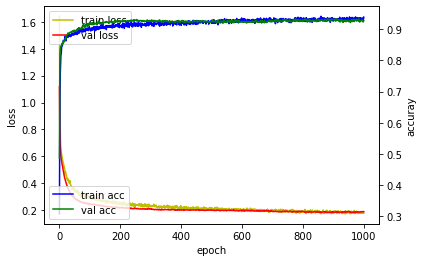

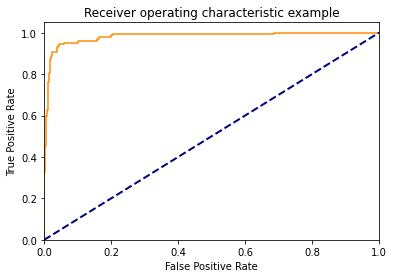


fpr : [0.         0.         0.         0.00208333 0.00208333 0.00416667
 0.00416667 0.00625    0.00625    0.00833333 0.00833333 0.01041667
 0.01041667 0.01458333 0.01458333 0.01666667 0.01666667 0.01875
 0.01875    0.02083333 0.02083333 0.02291667 0.02291667 0.02708333
 0.0375     0.0375     0.03958333 0.03958333 0.04166667 0.04166667
 0.04375    0.04375    0.05833333 0.05833333 0.1        0.1
 0.15833333 0.15833333 0.1625     0.1625     0.2        0.2
 0.20416667 0.20416667 0.24583333 0.25       0.36875    0.37291667
 0.38541667 0.38958333 0.42916667 0.43333333 0.525      0.52916667
 0.60416667 0.60833333 0.64166667 0.64583333 0.6875     0.6875
 0.68958333 0.69375    0.71666667 0.72083333 0.83541667 0.83958333
 0.85833333 0.8625     0.90416667 0.90833333 1.        ]

tpr : [0.         0.00628931 0.32704403 0.32704403 0.45283019 0.45283019
 0.54716981 0.54716981 0.59748428 0.59748428 0.62893082 0.62893082
 0.76100629 0.76100629 0.80503145 0.80503145 0.8427673  0.8427673
 0.87421384 0

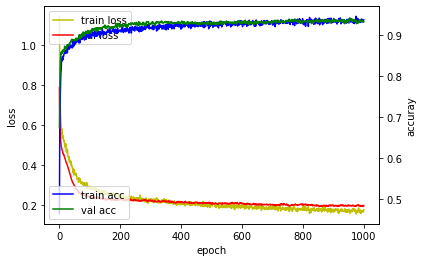

KeyboardInterrupt: 

In [38]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid', 'elu', 'selu']
lossFunc = ['categorical_crossentropy']
hidden = [3]
node = [
    [16, 8, 4], [16, 8, 8], [16, 8, 16], [16, 8, 32], [16, 16, 4], [16, 16, 8], [16, 16, 16], [16, 16, 32], [16, 32, 4], [16, 32, 8], [16, 32, 16], [16, 32, 32],
    [32, 8, 4], [32, 8, 8], [32, 8, 16], [32, 8, 32], [32, 16, 4], [32, 16, 8], [32, 16, 16], [32, 16, 32], [32, 32, 4], [32, 32, 8], [32, 32, 16], [32, 32, 32]
]
batchSize = [512]
dropout = [0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr)
                        print()
                        print('tpr :', tpr)
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()